 <ul>
    <li> <h2><b>Universidade de Brasília - UnB</b></h2> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/5) Atividade Prática Avaliativa
    Entrega da Atividade 01/10/2020 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol> 
<li> Colete os preços e volumes de um conjunto de ativos durante o período de 3 (três) anos, pertencentes a no mínimo 5 (cinco) Índices de Segmentos e Setoriais diferentes, e separe os 50 (cinquenta) ativos mais líquidos; </li><p></p>
    <li>Construa uma amostra de treinamento e outra de teste, sendo a primeira com os 2 (dois) primeiros anos e a segunda com o último anos; </li> <p></p>
    <li> Na amostra de treinamento, aplique uma clusterização não supervisionada (K-Means ou DBSCAN) e separe um ativo para cada clusters, com o critério que desejar (sugestão maior índice Sharpe); </li><p></p>
    <li> Aplique a Teoria do Portfolio Moderno de Markowitz nos ativos escolhidos no passo anterior, no sentido de alocar um capital de R$100.000,00; </li><p></p>
    <li> Verifique o resultado da alocação de capital com Markowitz, nos ativos separados na fase de treinamento, amostra de teste que representa o último ano da aquisição; </li><p></p>
    <li> Descreva suas impressores relativas ao processo e resultados encontrados. </li>
</ol>
</div>


### Questão 1 e 2: 

In [1]:
from financeiro import FinancialSignal, AIFinancial, FinancialData
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fi = FinancialData()
indexes = ["IFNC", "BDRX", "IMAT", "IEE", "IMOB"]
# data = fi.get_data_by_indexes(indexes)

In [3]:
# train_date = ('2017-10-28', '2019-10-28')
# test_date = ('2019-10-28', '2020-10-28')
# train, test, volumes = fi.get_data_train_and_test(data, train_date, test_date)

In [4]:
# import pickle

# file = open('train.pkl', 'wb')
# pickle.dump(train, file)
# file.close()

# file = open('test.pkl', 'wb')
# pickle.dump(test, file)
# file.close()

# file = open('volume.pkl', 'wb')
# pickle.dump(train, file)
# file.close()

In [5]:
import pickle
file = open('train.pkl', 'rb')
train = pickle.load(file)
file.close()
file = open('test.pkl', 'rb')
test = pickle.load(file)
file.close()
file = open('volume.pkl', 'rb')
volumes = pickle.load(file)
file.close()

In [6]:
list_v = {}
for df in train.keys():
    a = volumes[df].mean().sort_values(ascending=False)[:10]
    list_v[df] = a.keys()
    
for key in train.keys():
    train[key] = train[key][list_v[key]]

In [7]:
train["IMAT"].describe()

,VALE3.SA,BRKM5.SA,SUZB3.SA,BRAP4.SA,KLBN11.SA,GGBR4.SA,DTEX3.SA,CSNA3.SA,USIM5.SA,GOAU4.SA
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,44.532810,41.772304,35.356391,29.278261,16.694876,14.309315,10.254148,10.022227,9.005798,6.718537
std,5.950705,6.956627,9.405006,2.996786,1.516215,1.566357,1.562375,3.435729,1.149953,0.756470
min,28.543030,25.404394,17.031906,19.559958,13.909518,9.479700,7.253834,6.024615,6.819429,4.323398
25%,41.042706,38.173582,30.762500,28.164711,15.497757,13.459140,8.973842,7.393405,8.134605,6.295769
50%,45.464016,42.051664,36.362001,29.605930,16.340961,14.705152,10.032158,8.497528,8.821419,6.901825
75%,48.496438,46.990047,43.213482,31.237845,17.843902,15.380362,11.615963,13.523422,9.760294,7.266086
max,58.162998,55.835045,53.250553,36.089314,20.415396,17.469555,13.338112,17.806318,12.366889,8.064862


### Questão 3

  0%|          | 0/5 [00:00<?, ?it/s]

Segmentacao de dados antes: 
Segmentacao de dados antes: 


 20%|██        | 1/5 [00:01<00:06,  1.67s/it]

Ativos com Melhor Relação em Cada Cluster: ['BBSE3.SA', 'BIDI4.SA', 'B3SA3.SA', 'CIEL3.SA', 'IRBR3.SA']
['BBSE3.SA', 'BIDI4.SA', 'B3SA3.SA', 'CIEL3.SA', 'IRBR3.SA']
Segmentacao de dados antes: 
Segmentacao de dados antes: 


 40%|████      | 2/5 [00:03<00:04,  1.66s/it]

Ativos com Melhor Relação em Cada Cluster: ['WALM34.SA', 'GEOO34.SA', 'CMCS34.SA', 'AAPL34.SA', 'FBOK34.SA']
['WALM34.SA', 'GEOO34.SA', 'CMCS34.SA', 'AAPL34.SA', 'FBOK34.SA']
Segmentacao de dados antes: 
Segmentacao de dados antes: 


 60%|██████    | 3/5 [00:04<00:03,  1.57s/it]

Ativos com Melhor Relação em Cada Cluster: ['VALE3.SA', 'SUZB3.SA', 'KLBN11.SA', 'CSNA3.SA', 'BRKM5.SA']
['VALE3.SA', 'SUZB3.SA', 'KLBN11.SA', 'CSNA3.SA', 'BRKM5.SA']
Segmentacao de dados antes: 
Segmentacao de dados antes: 


 80%|████████  | 4/5 [00:06<00:01,  1.56s/it]

Ativos com Melhor Relação em Cada Cluster: ['CESP6.SA', 'ELET3.SA', 'CMIG4.SA', 'TRPL4.SA', 'LIGT3.SA']
['CESP6.SA', 'ELET3.SA', 'CMIG4.SA', 'TRPL4.SA', 'LIGT3.SA']
Segmentacao de dados antes: 


/home/victorhdcoelho/Documentos/UNB/SinaisFinanceiros/PersonalProjects/atividade1-SinaisDigitais/financeiro.py:154: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(40, 10))


Segmentacao de dados antes: 


100%|██████████| 5/5 [00:07<00:00,  1.51s/it]

Ativos com Melhor Relação em Cada Cluster: ['EVEN3.SA', 'BRML3.SA', 'GFSA3.SA', 'TEND3.SA', 'JHSF3.SA']
['EVEN3.SA', 'BRML3.SA', 'GFSA3.SA', 'TEND3.SA', 'JHSF3.SA']


[('IFNC', ('IRBR3.SA', 0.11470204273258071)),
 ('BDRX', ('AAPL34.SA', 0.07925892661211499)),
 ('IMAT', ('CSNA3.SA', 0.03283336867547797)),
 ('IEE', ('CESP6.SA', 0.10342208725748588)),
 ('IMOB', ('TEND3.SA', 0.09399037738228265))]

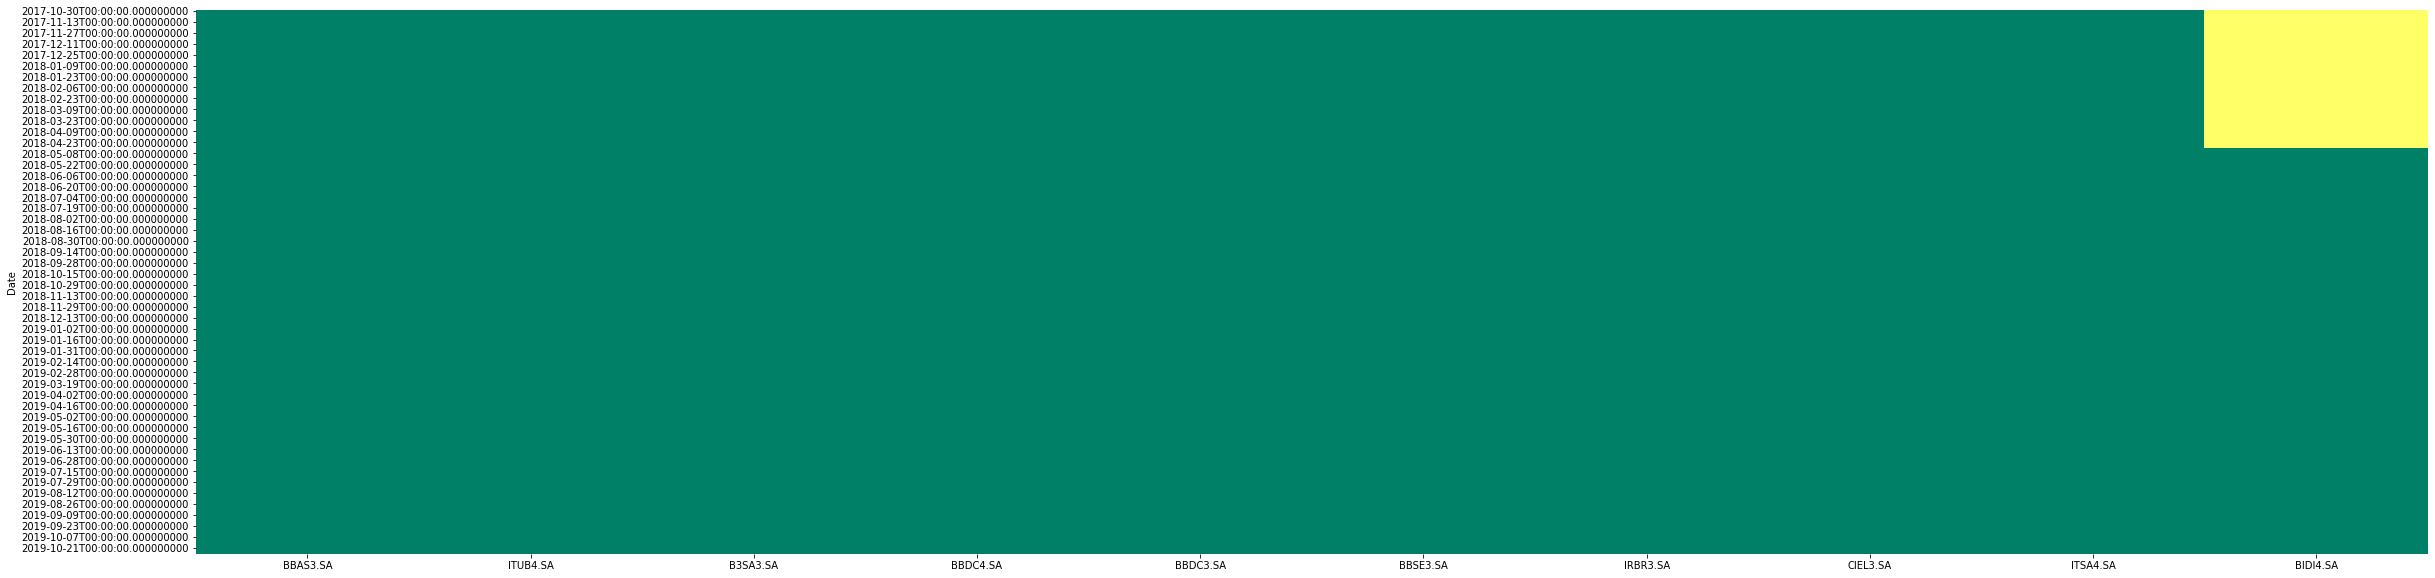

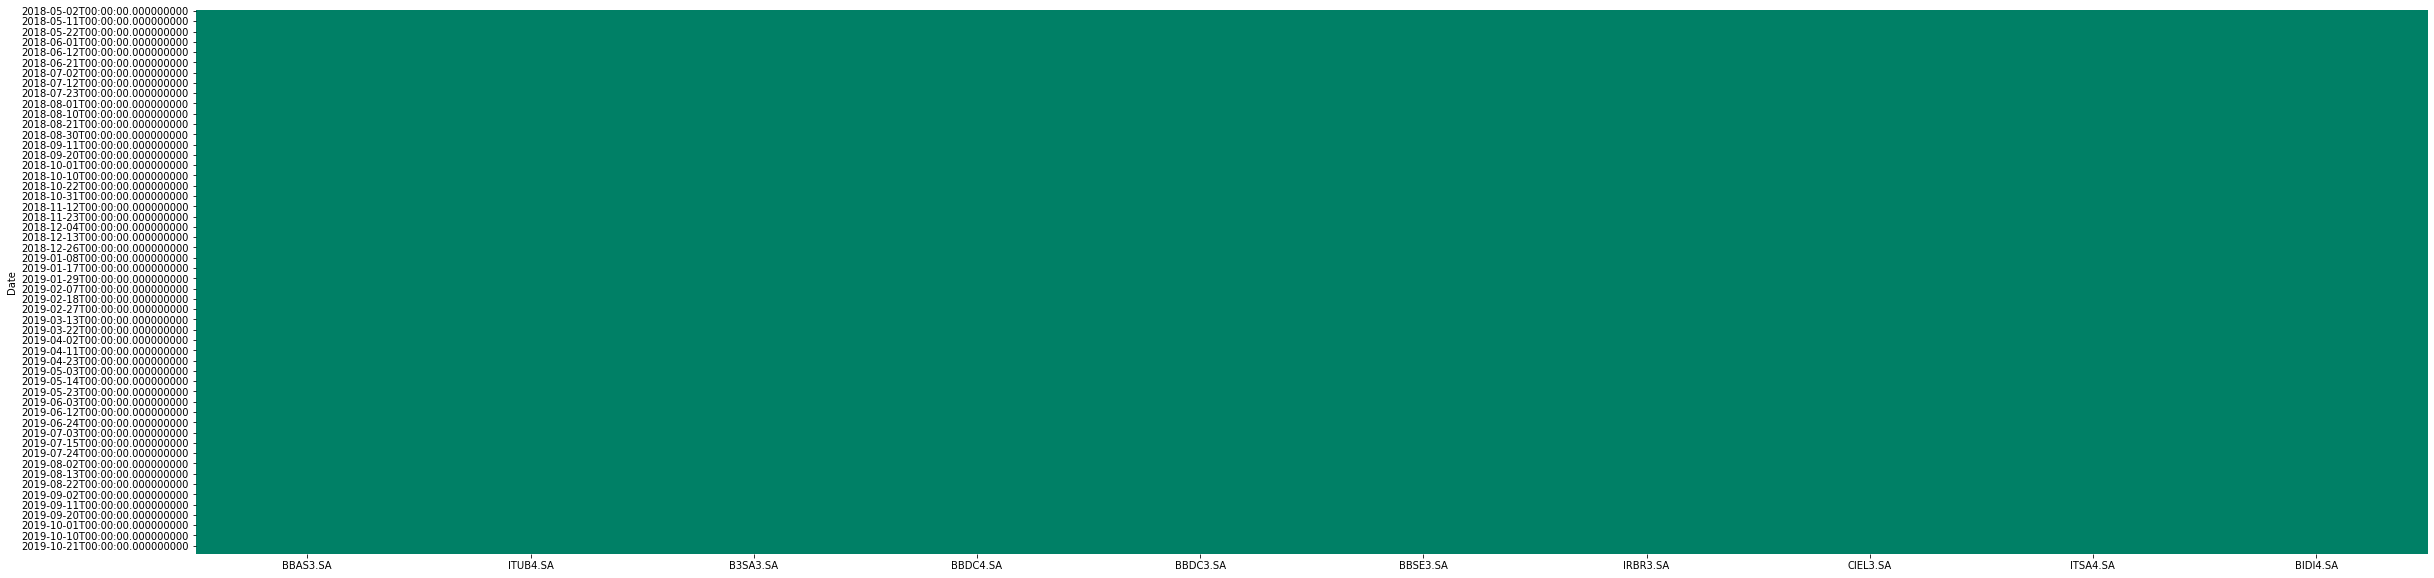

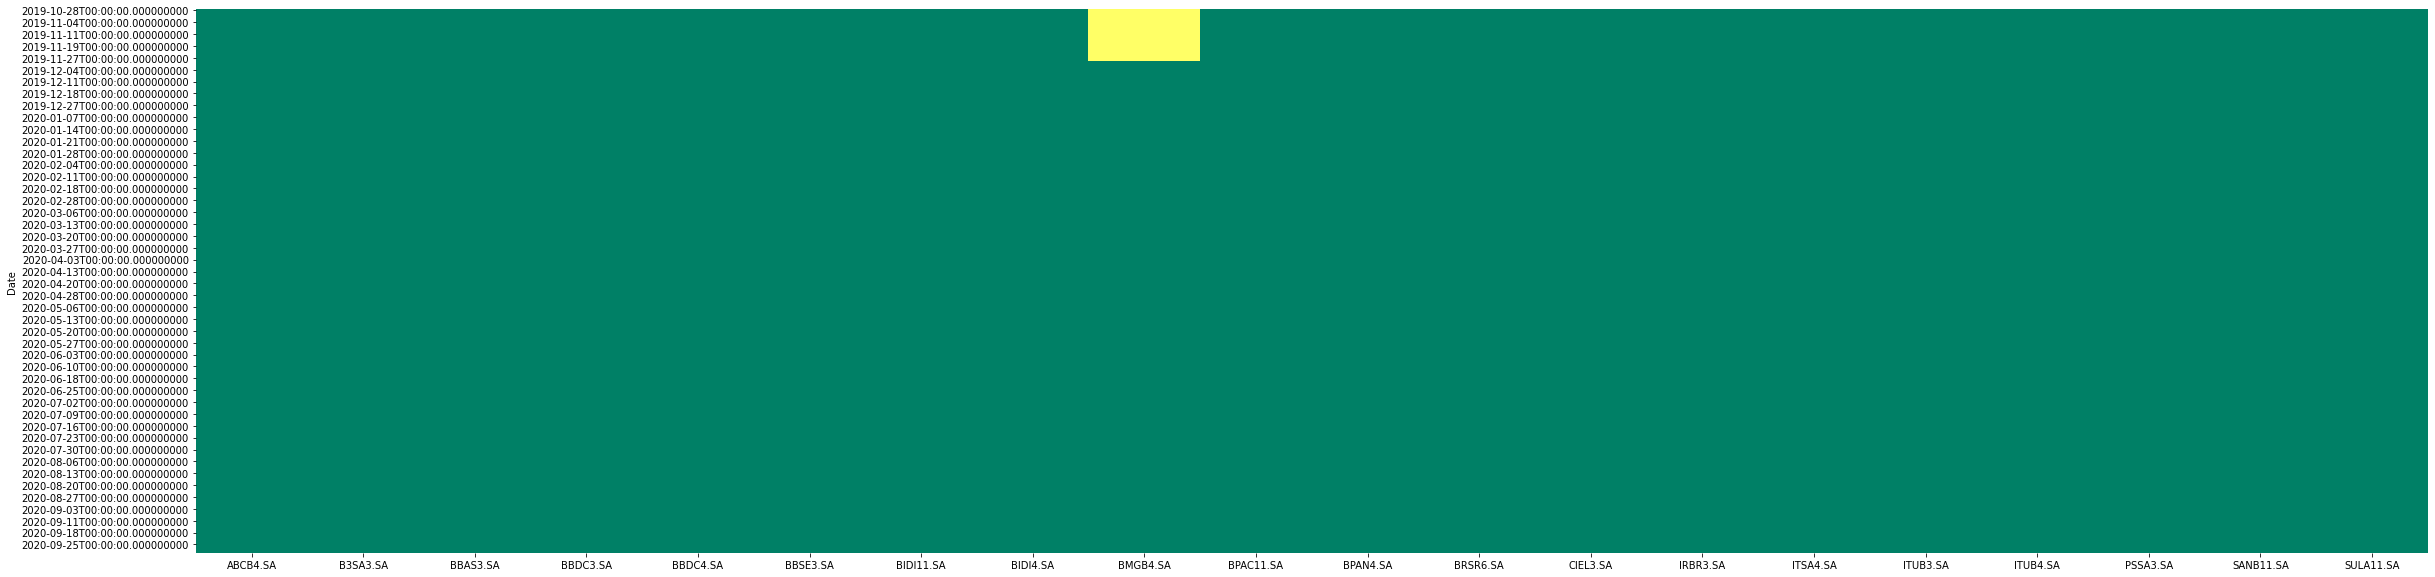

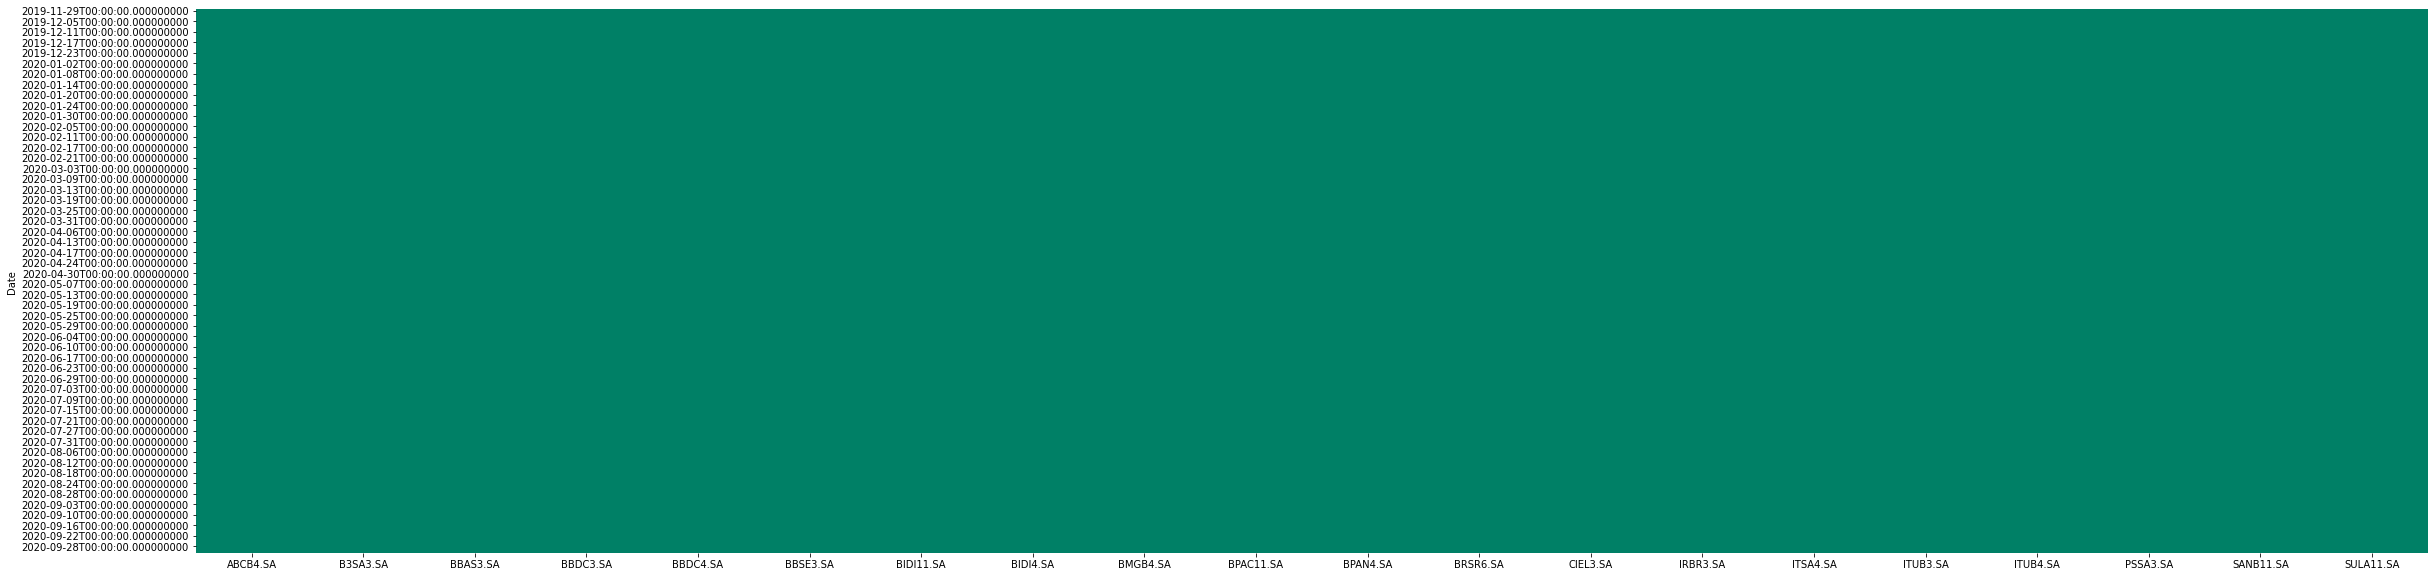

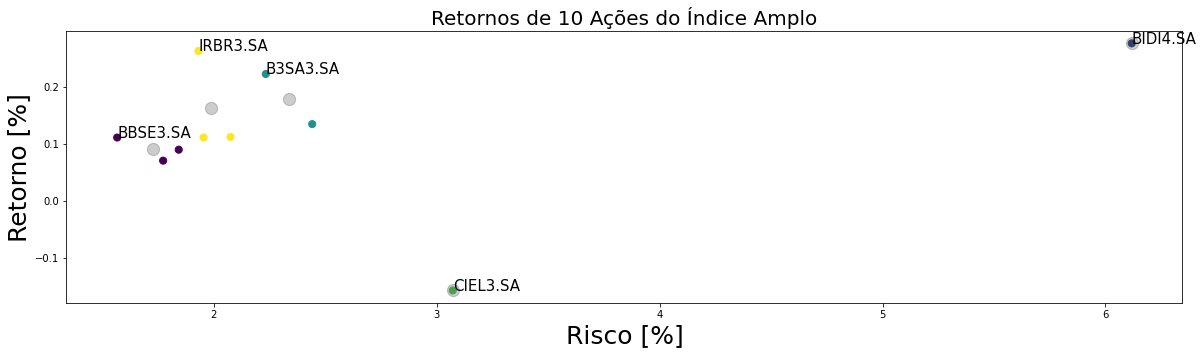

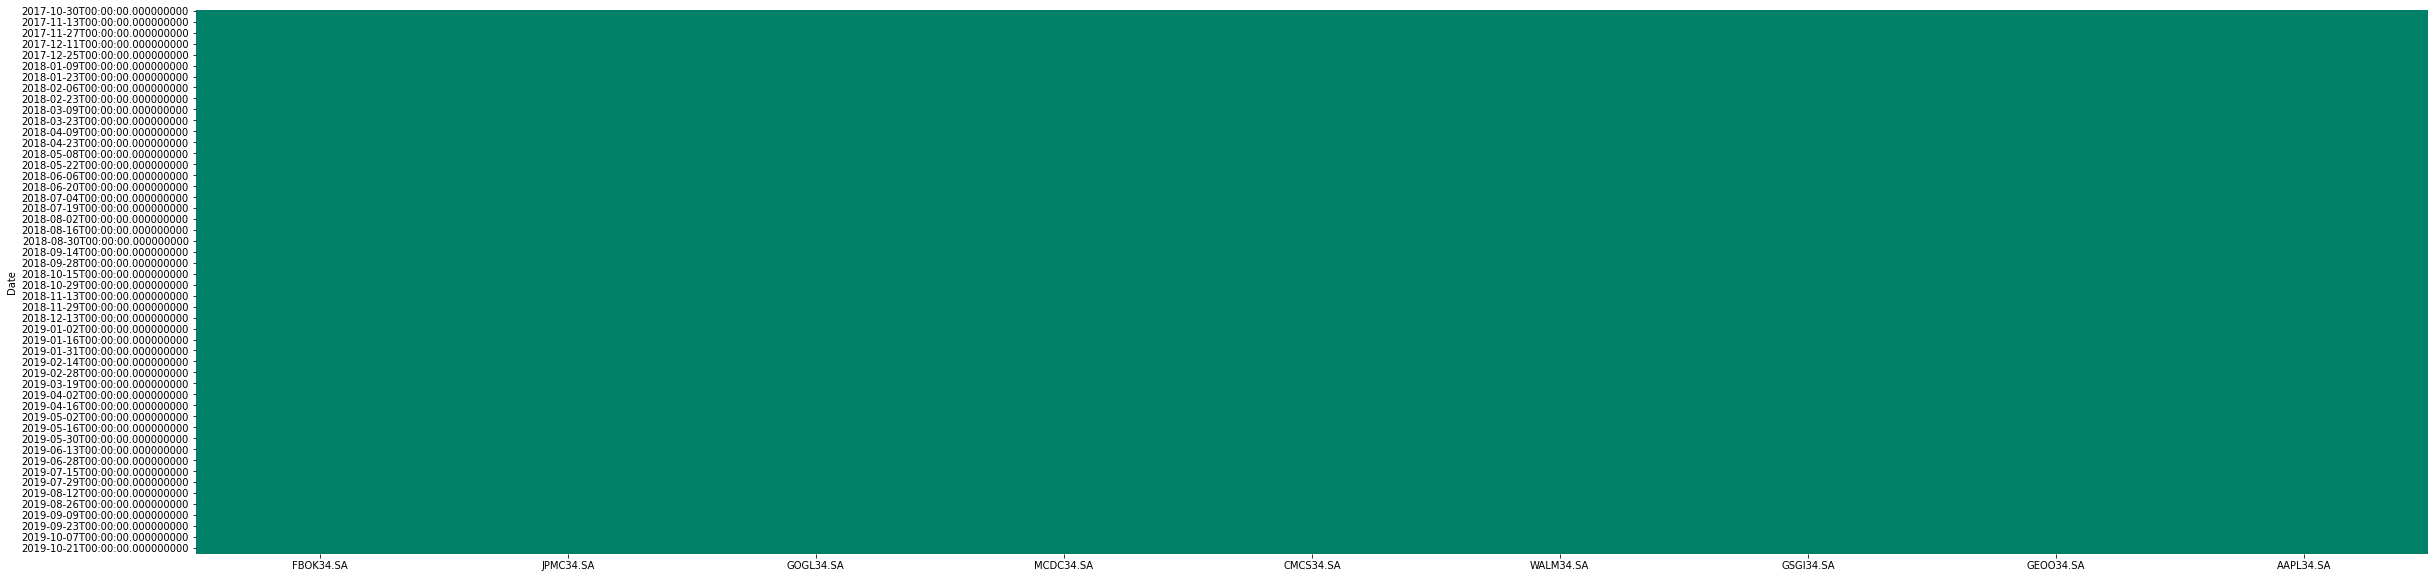

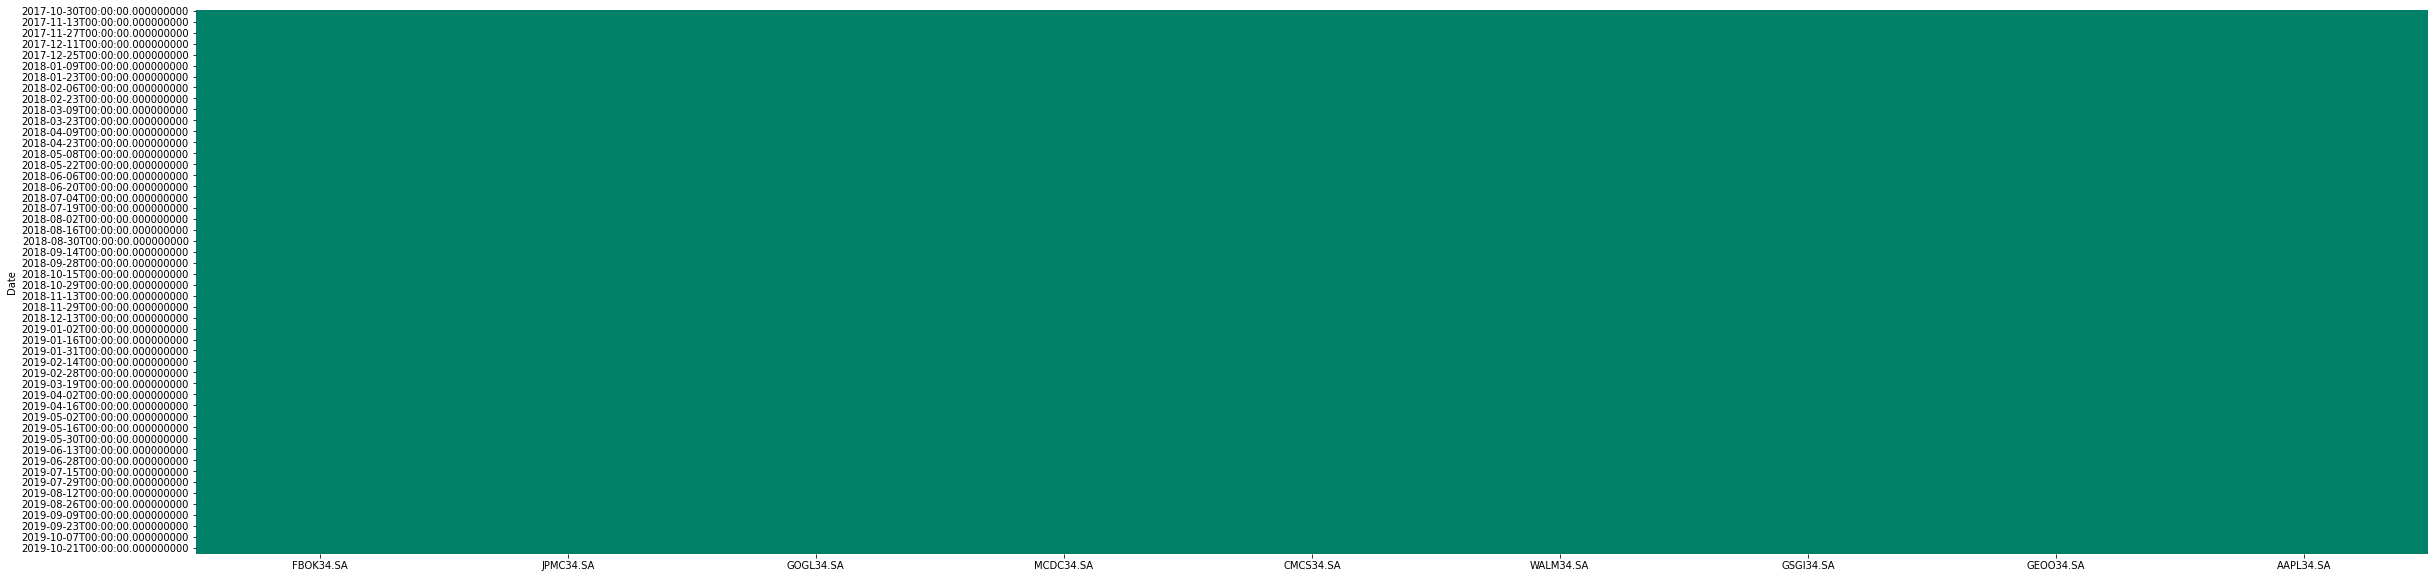

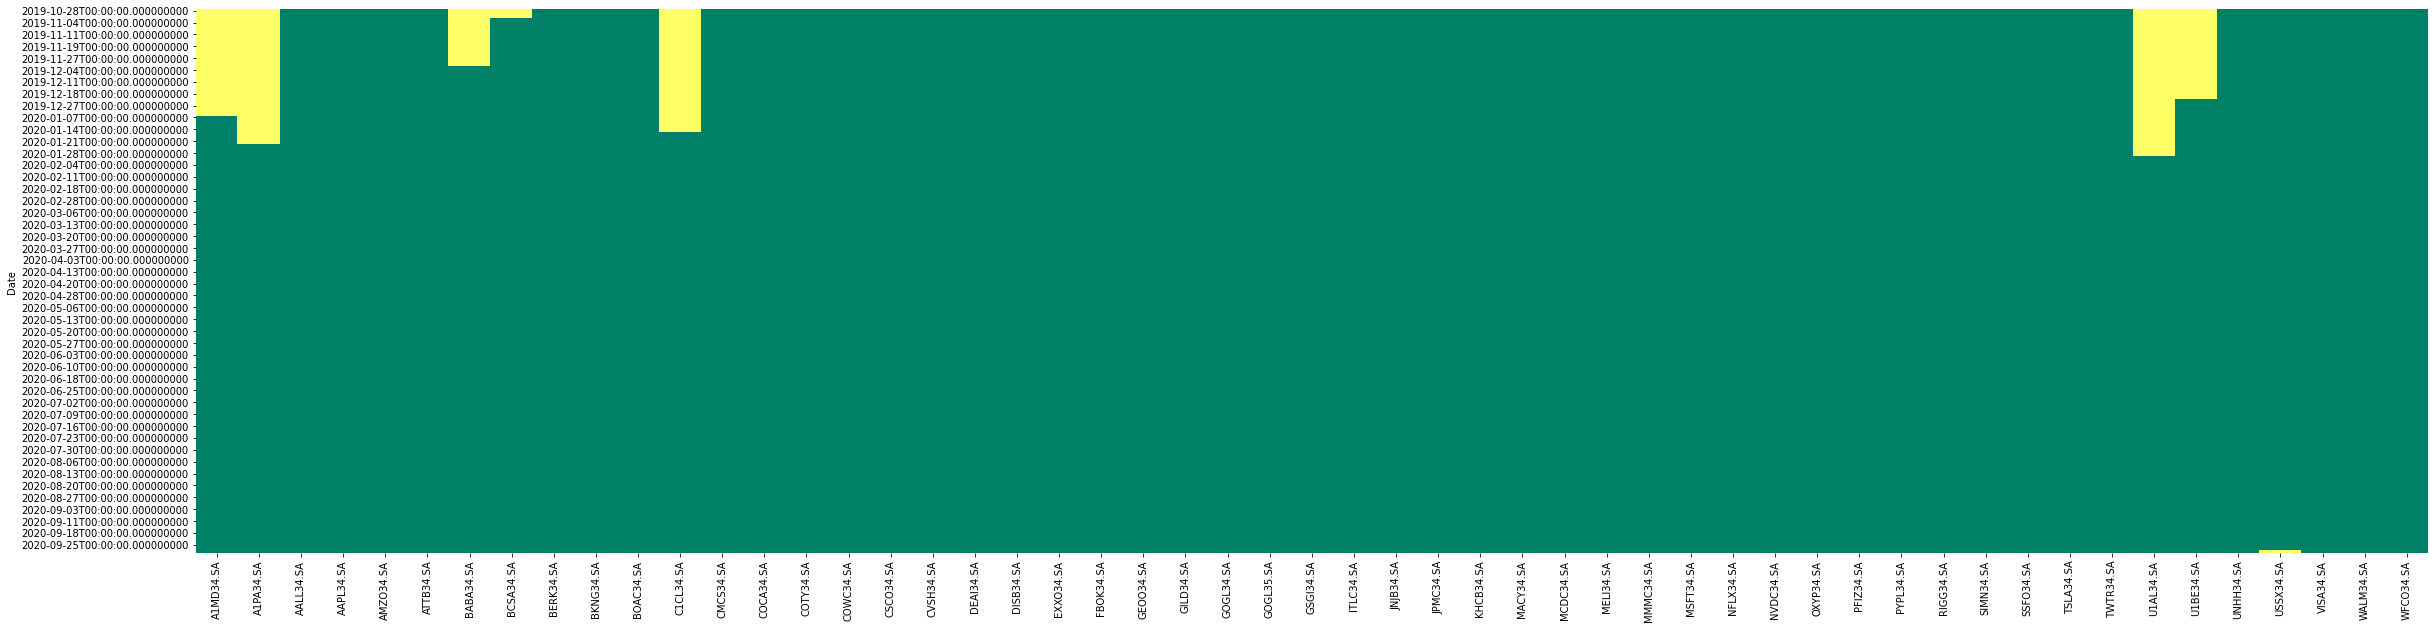

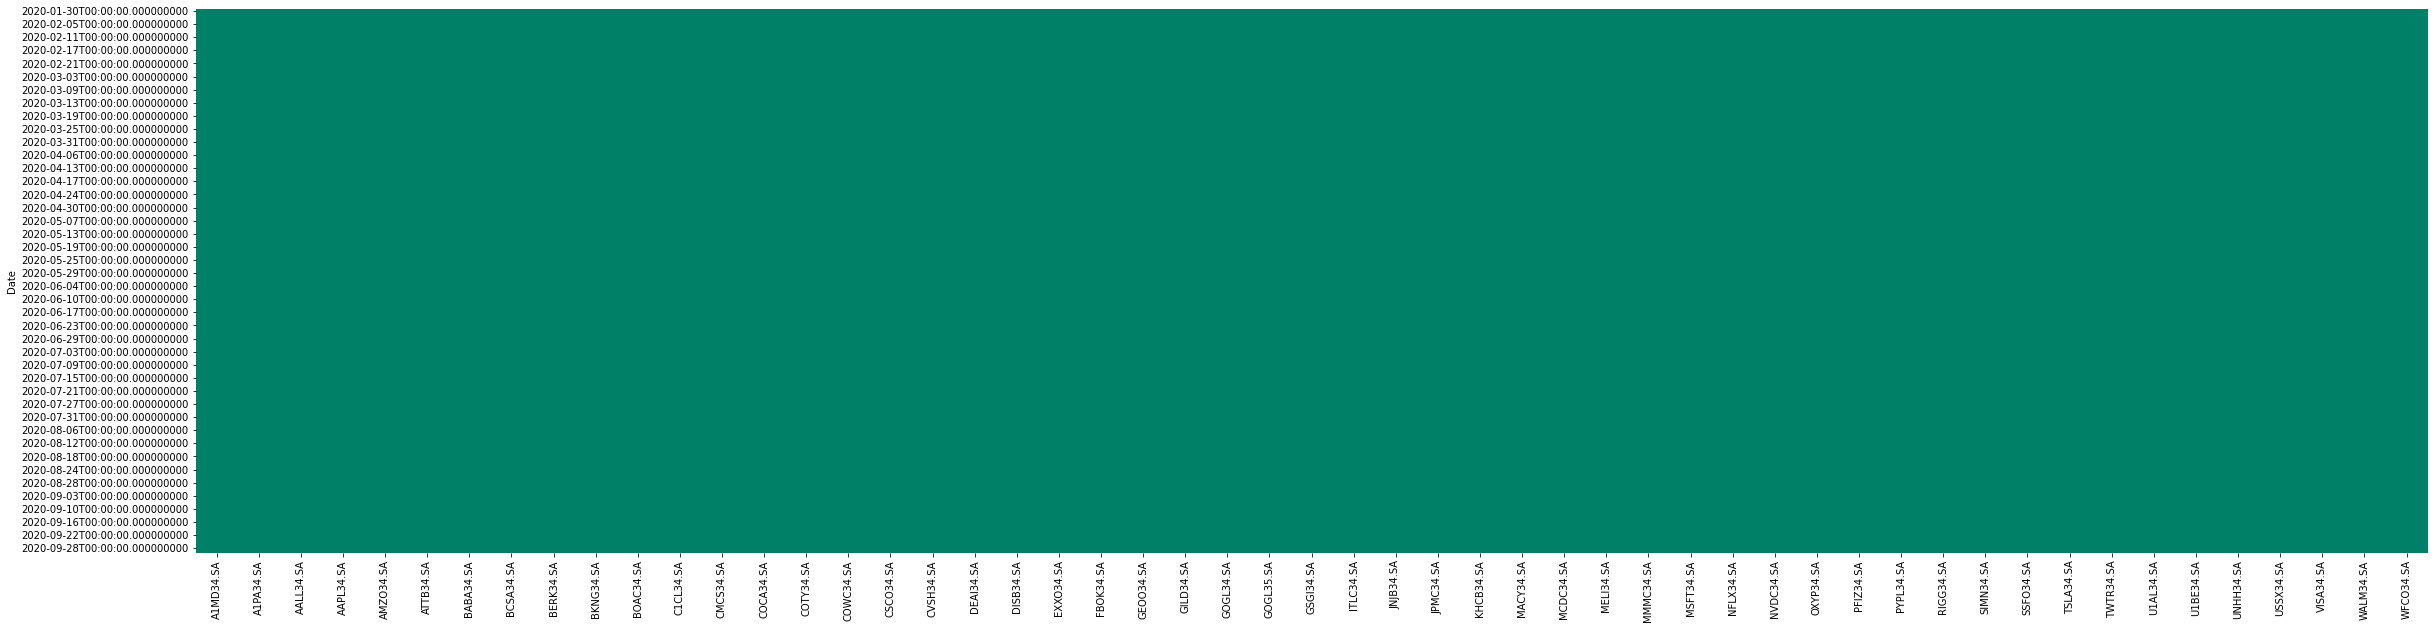

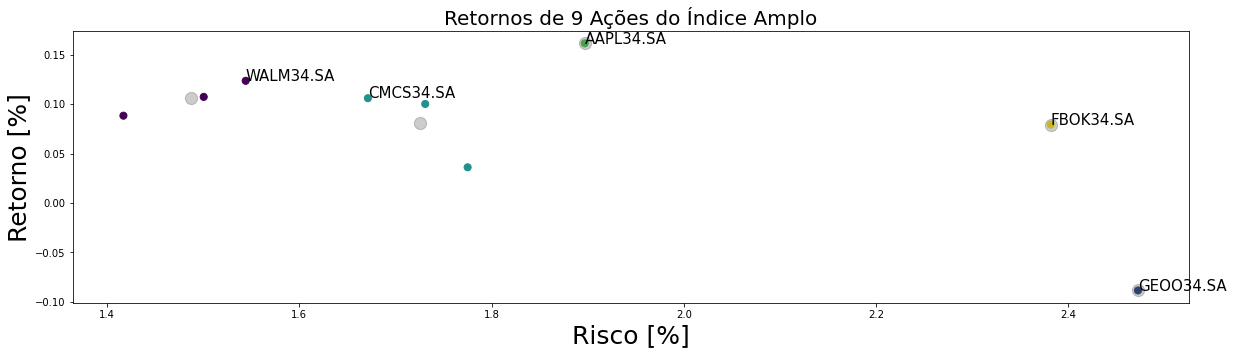

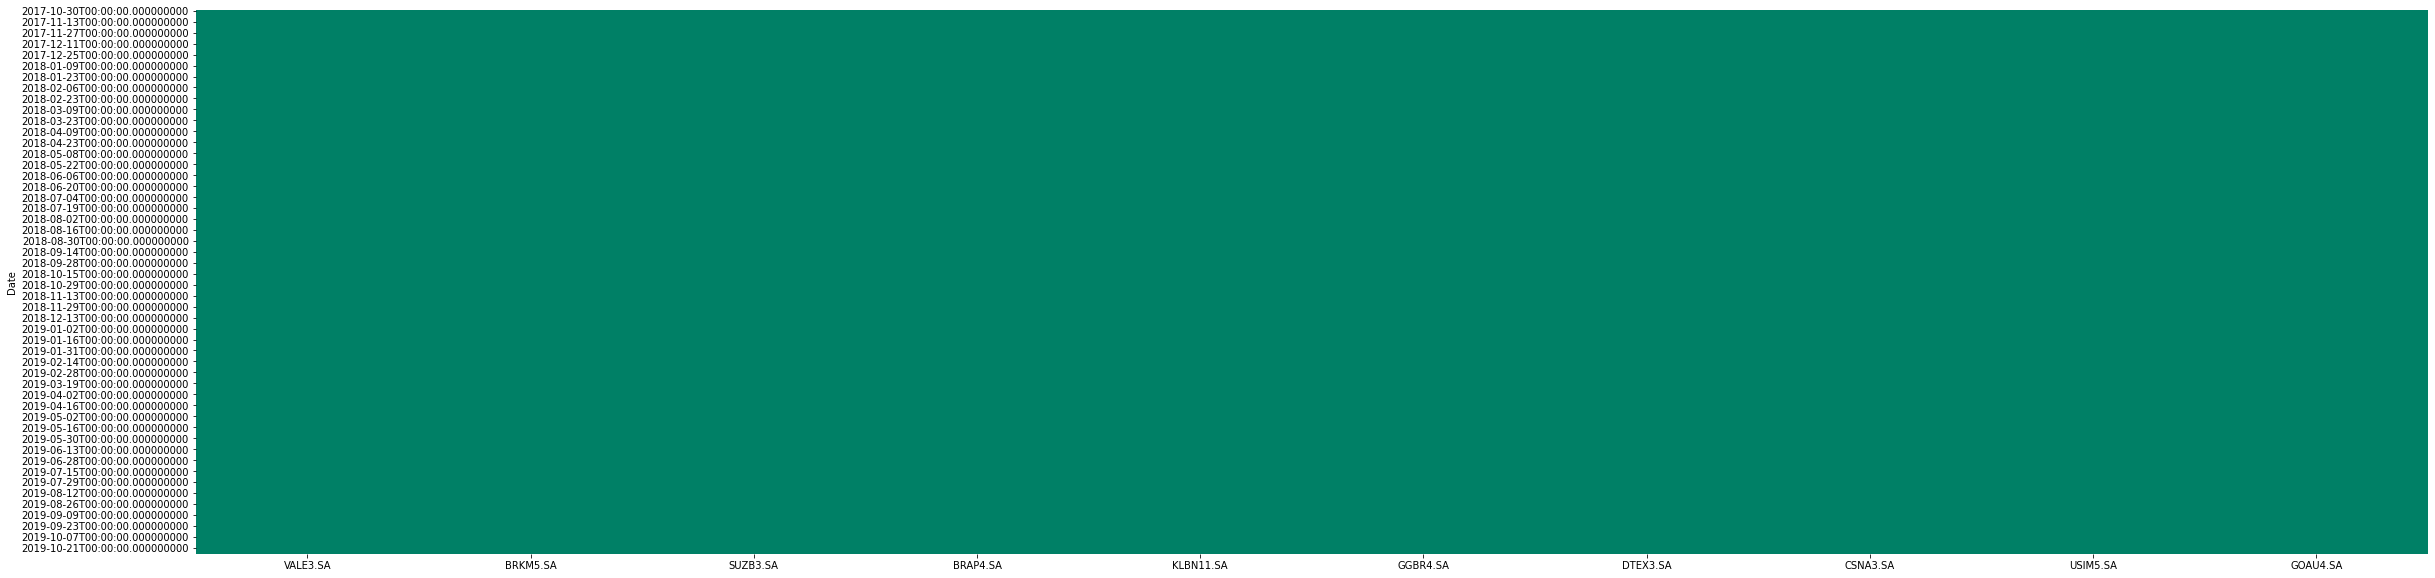

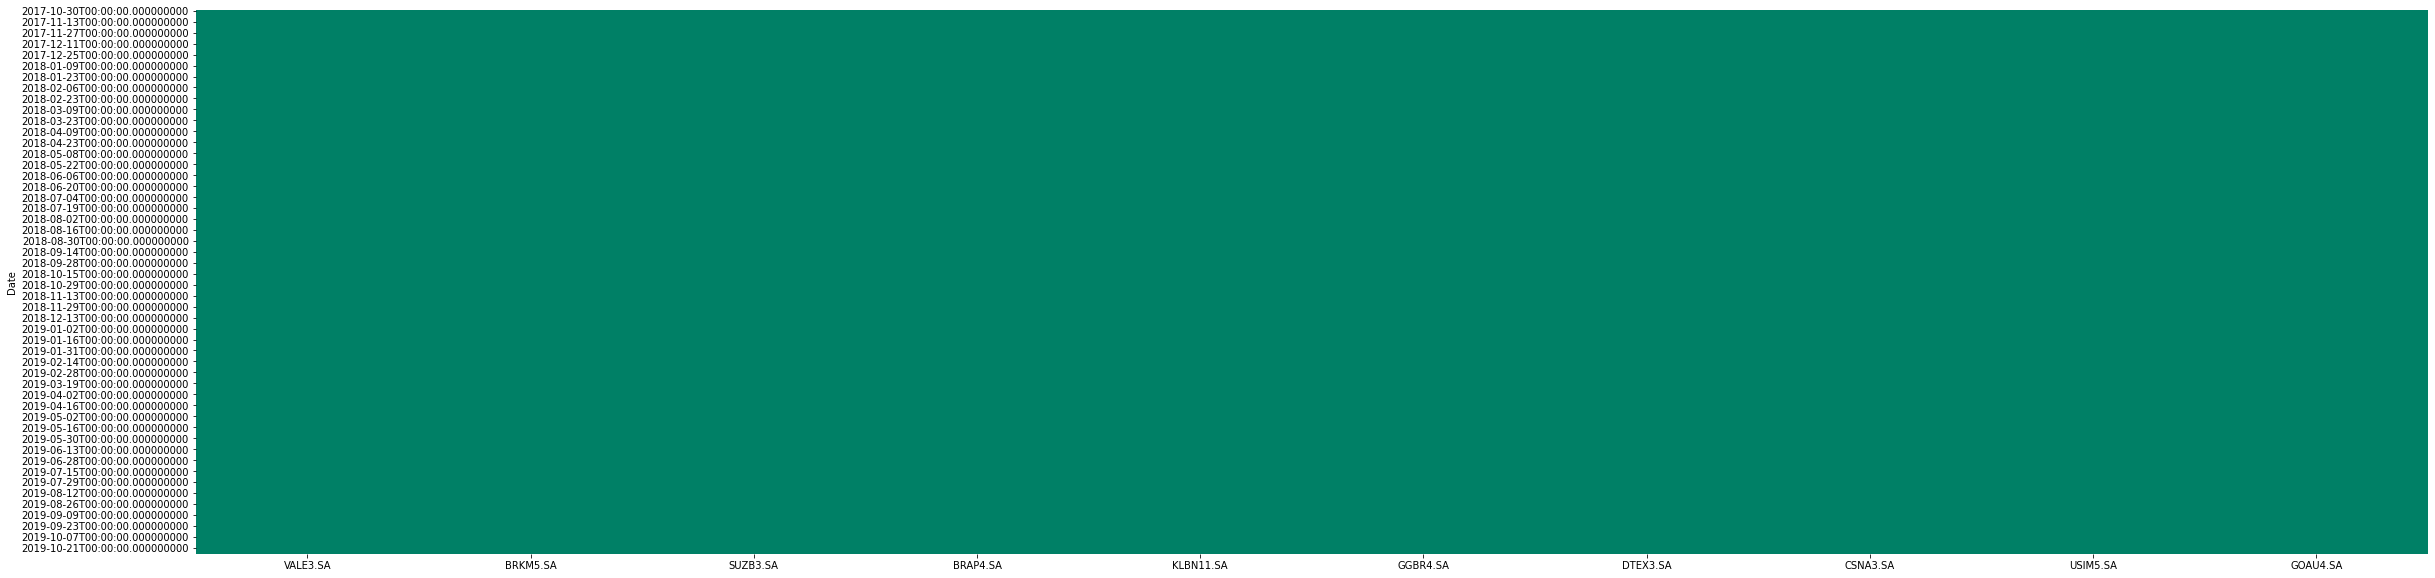

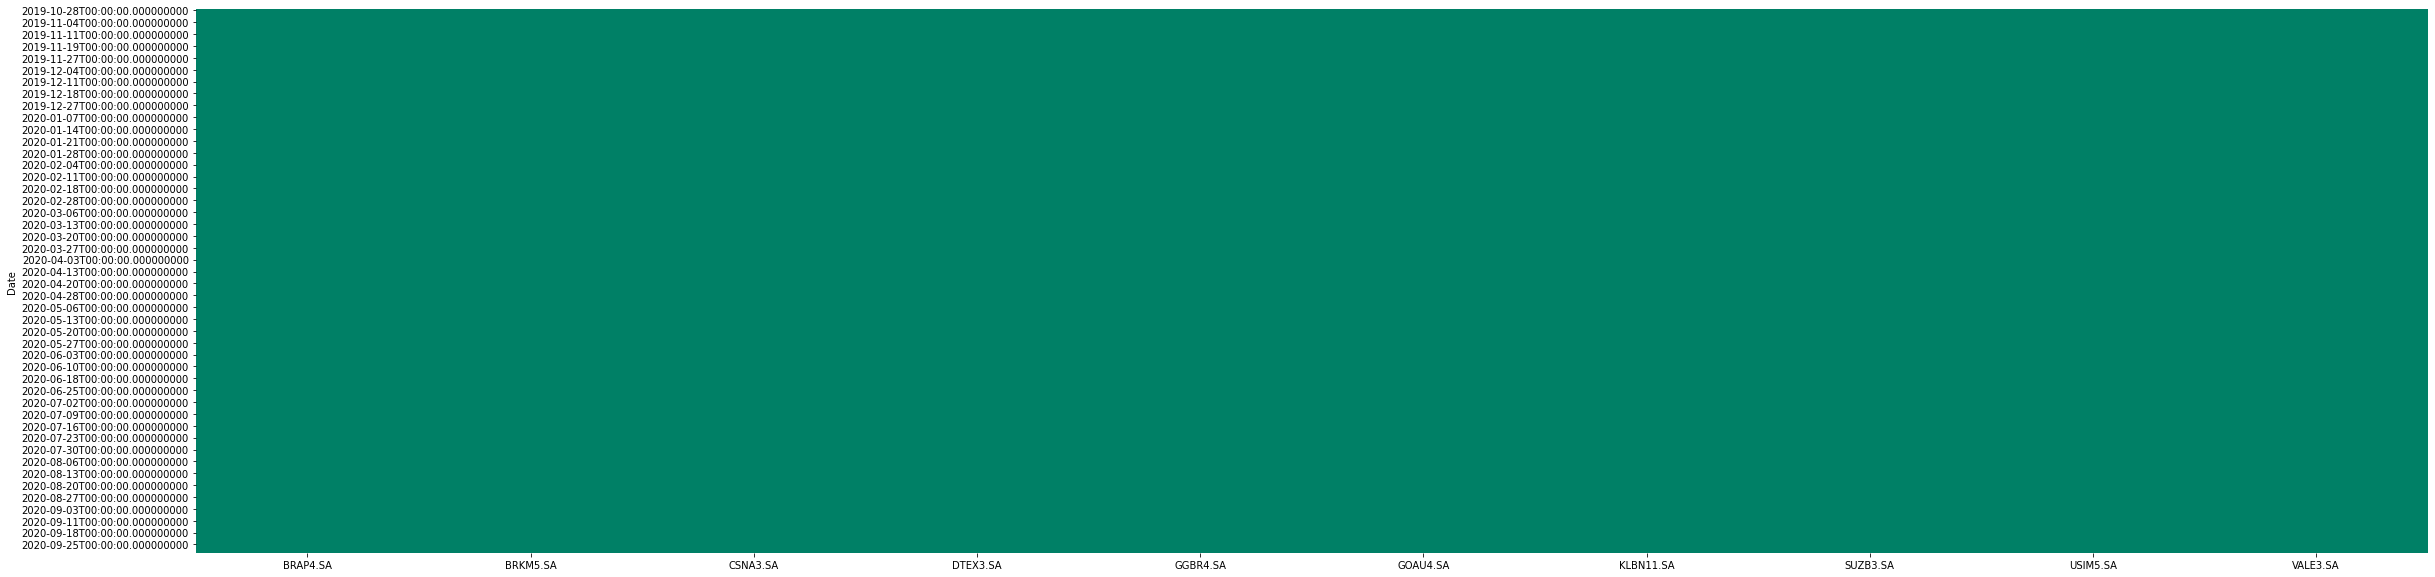

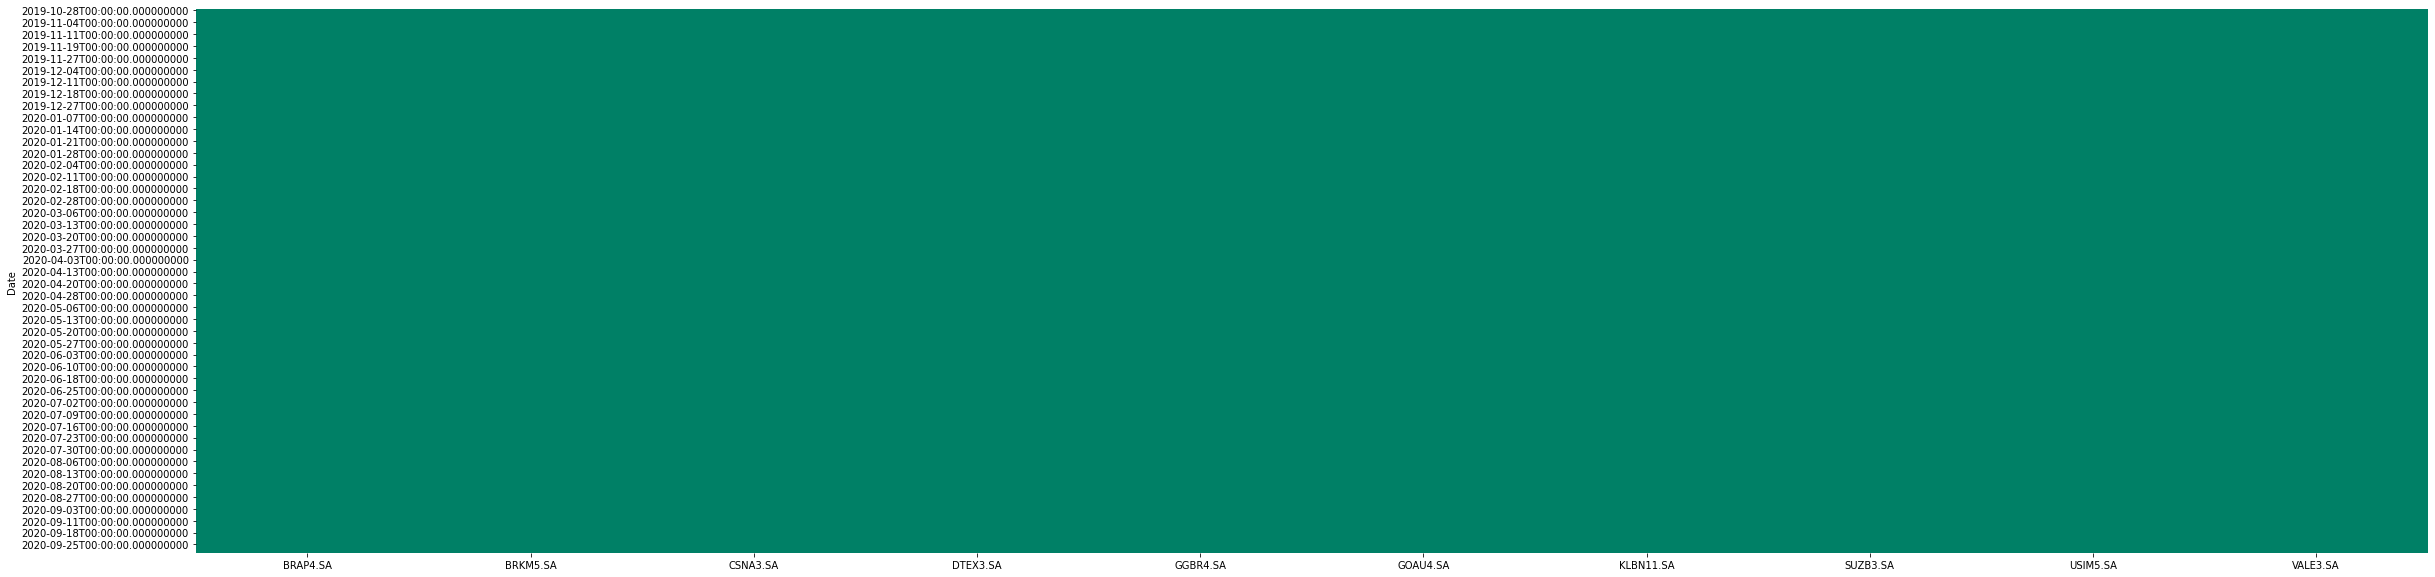

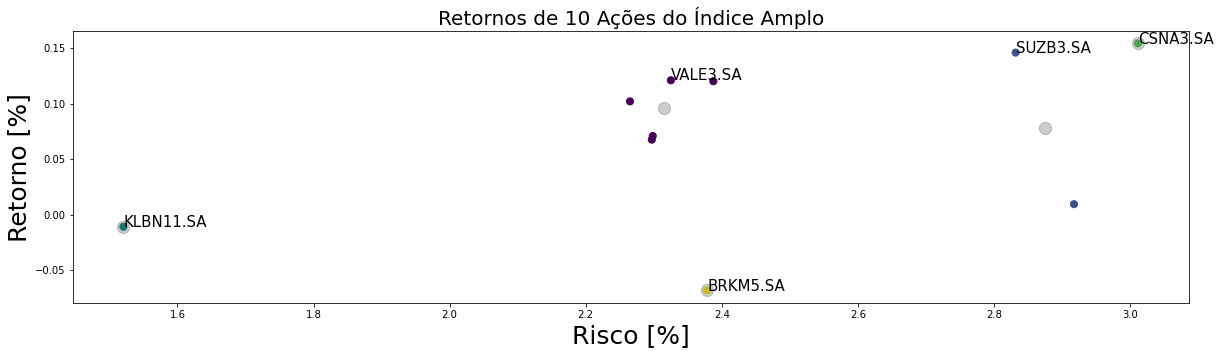

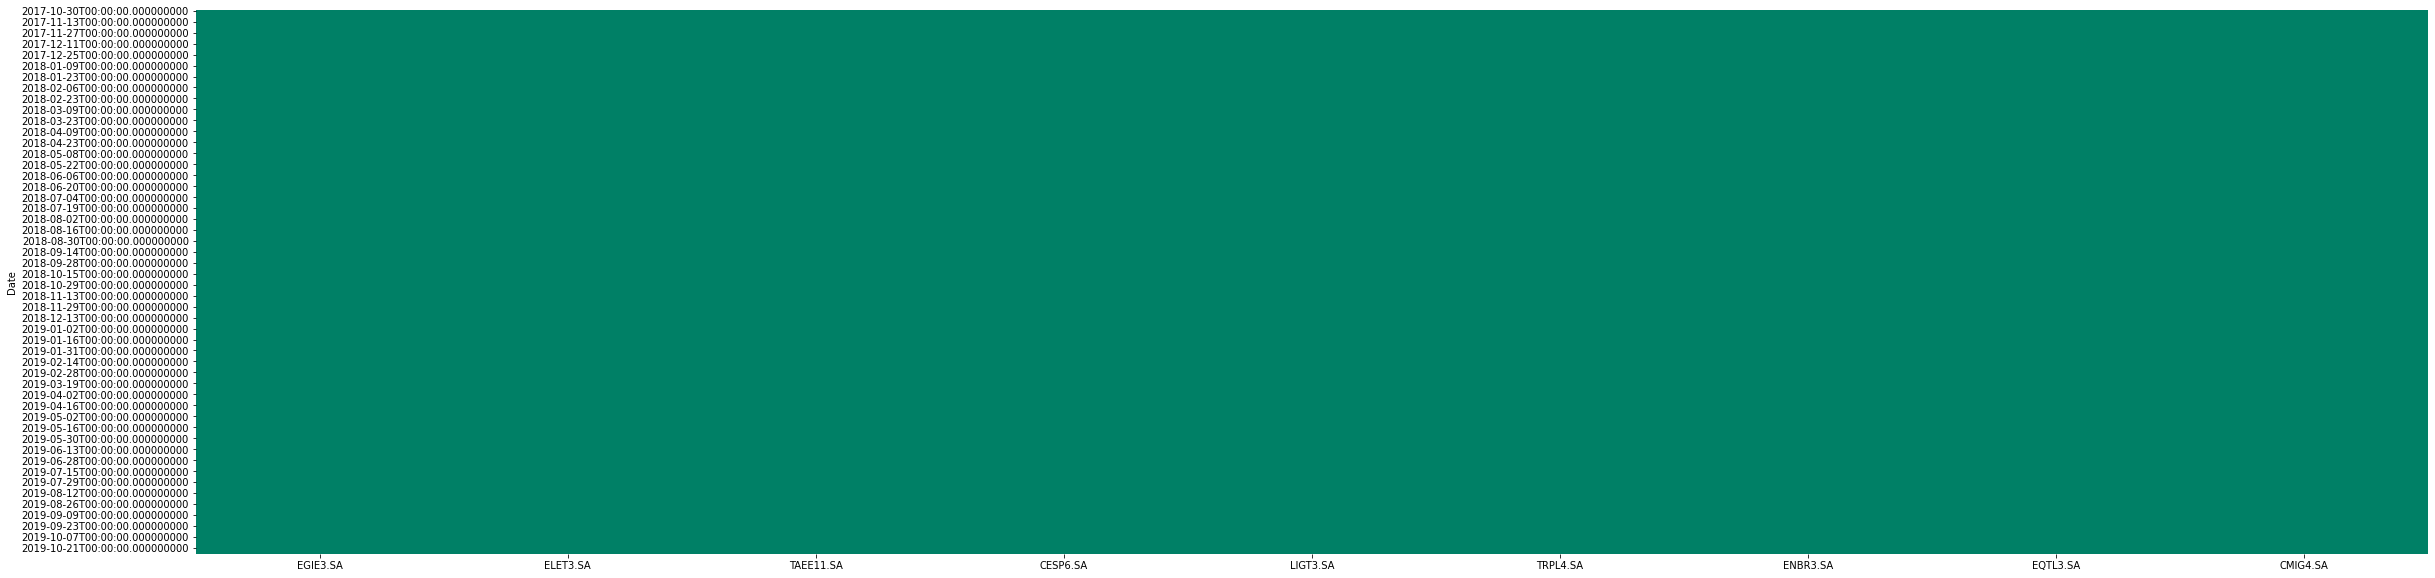

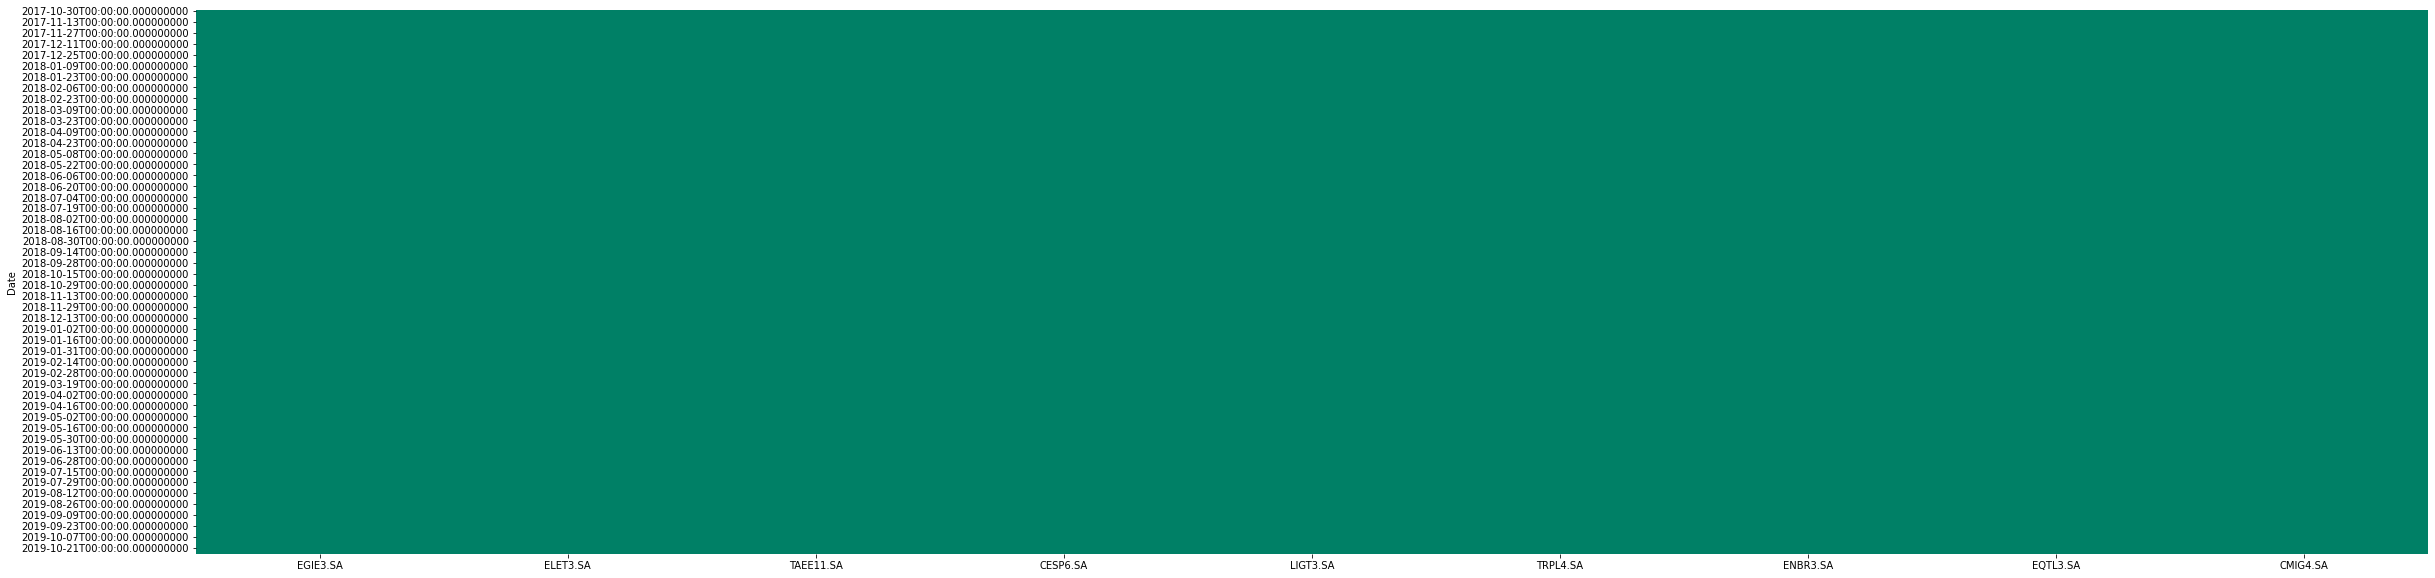

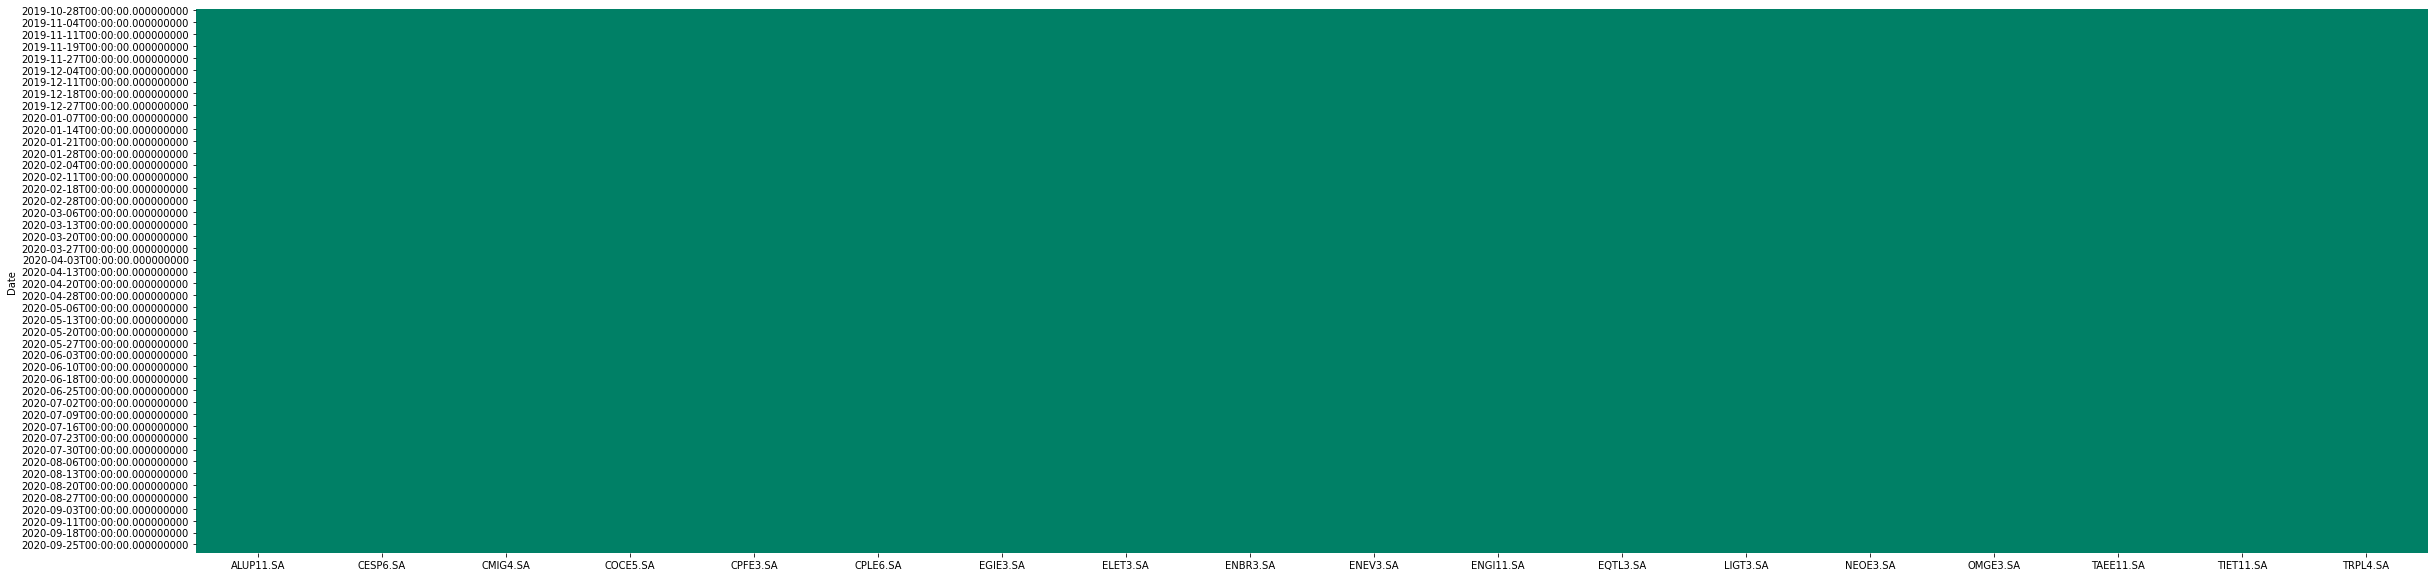

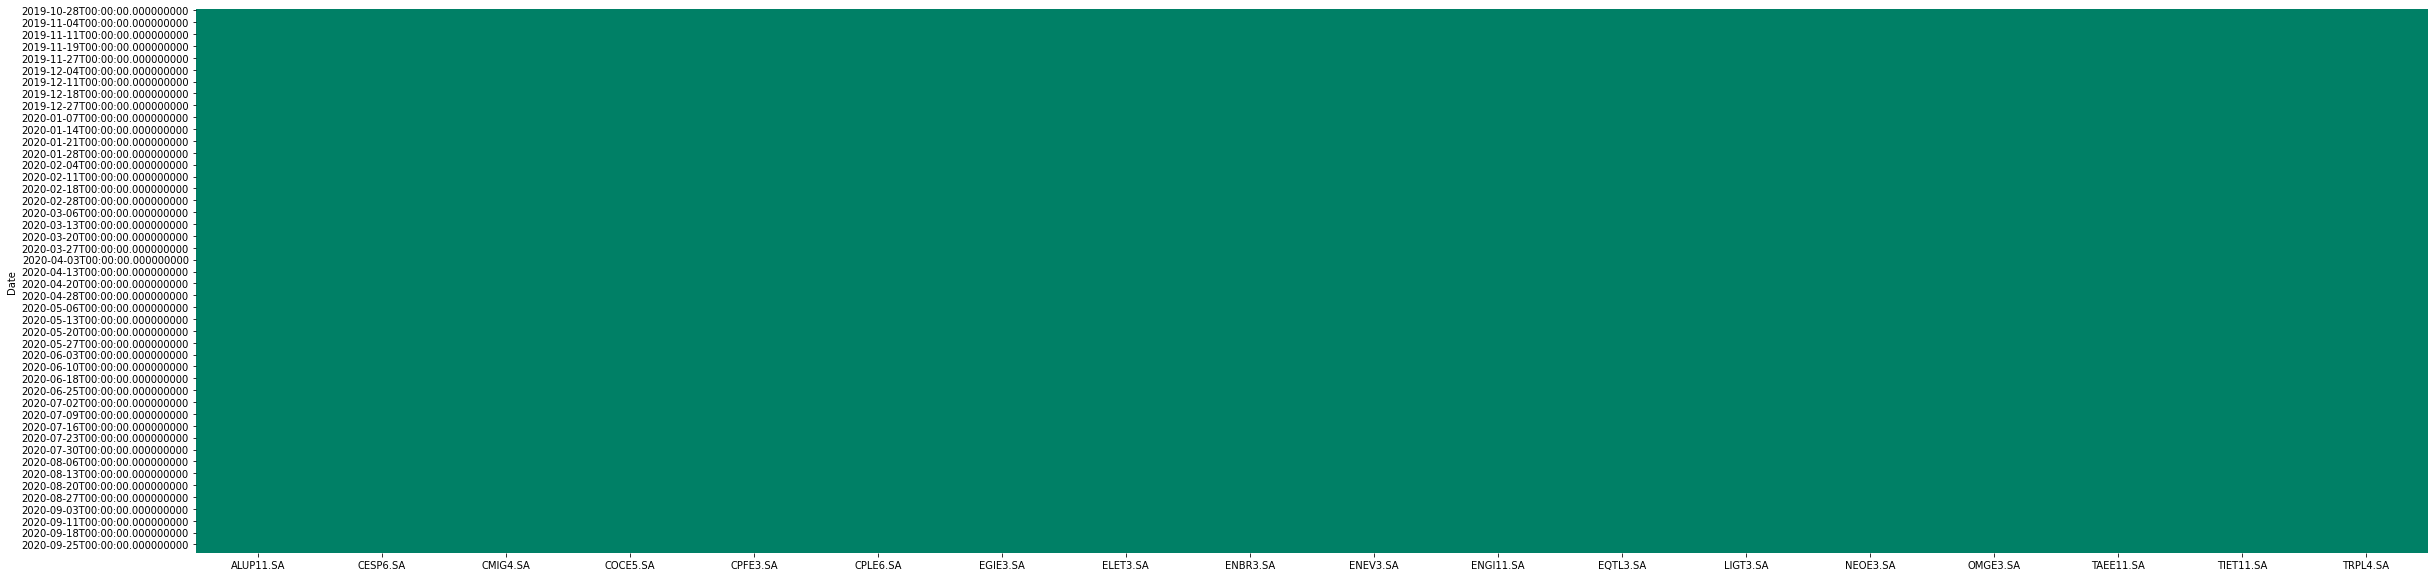

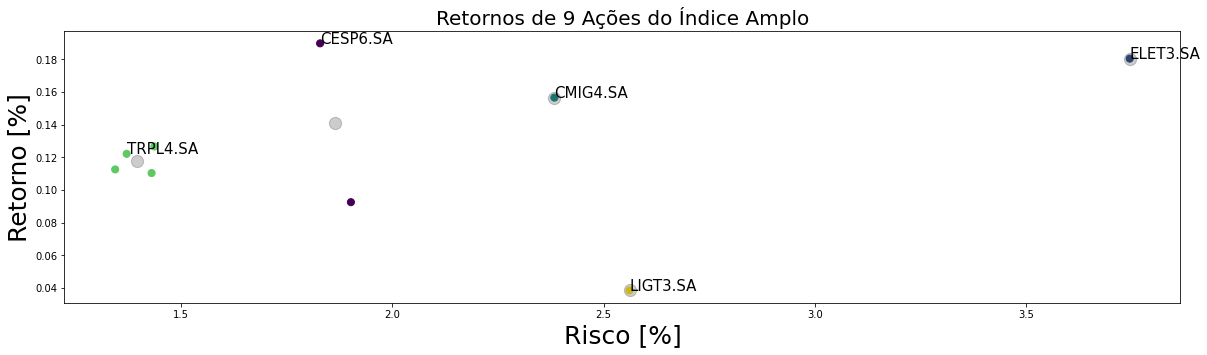

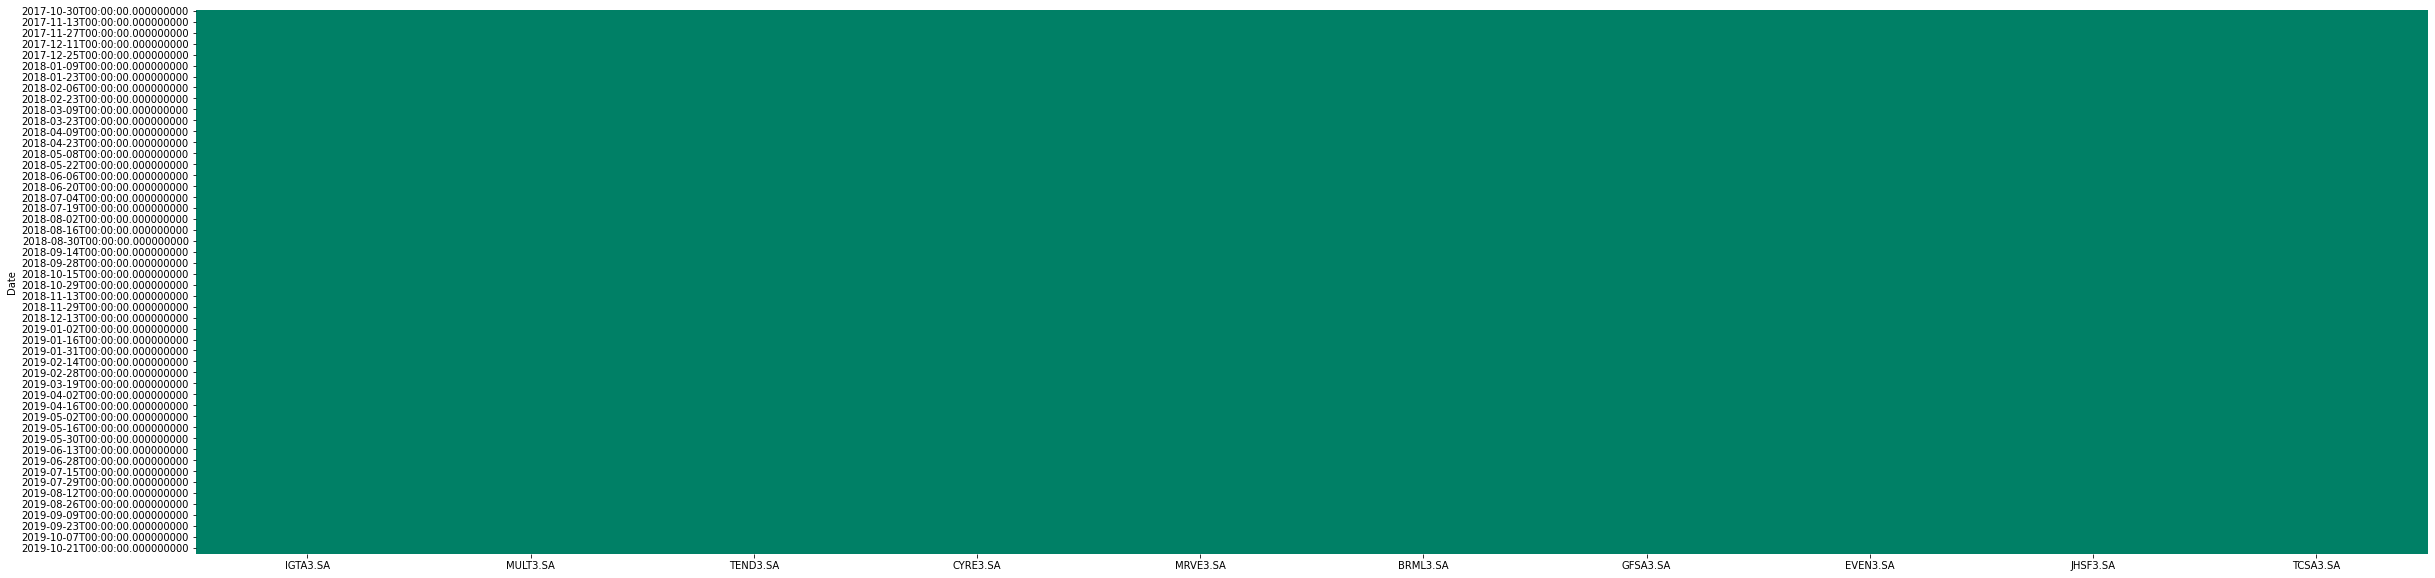

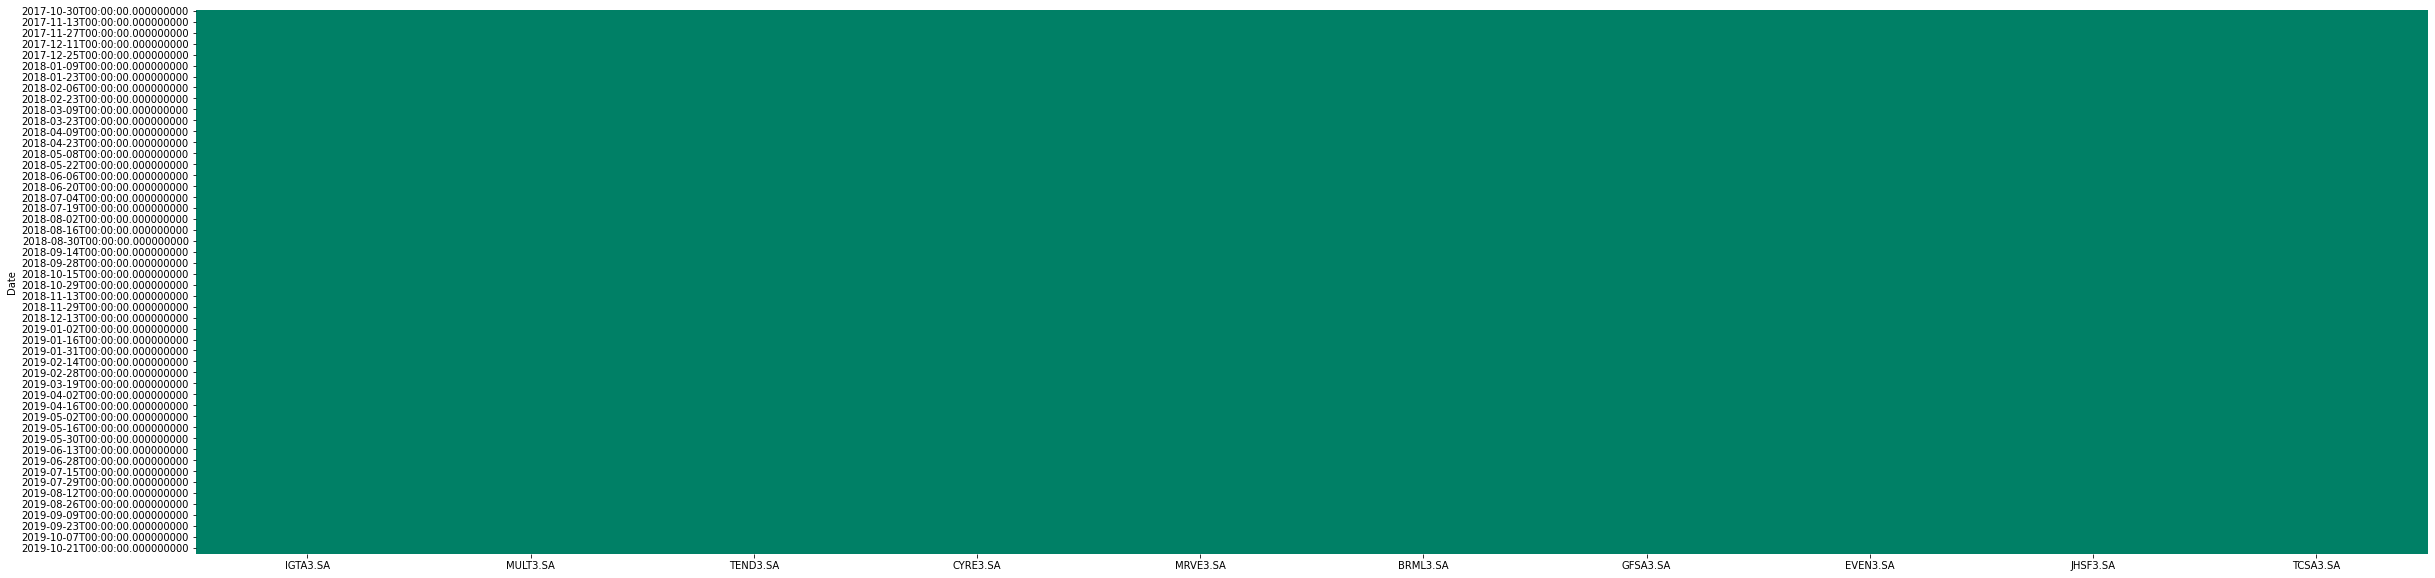

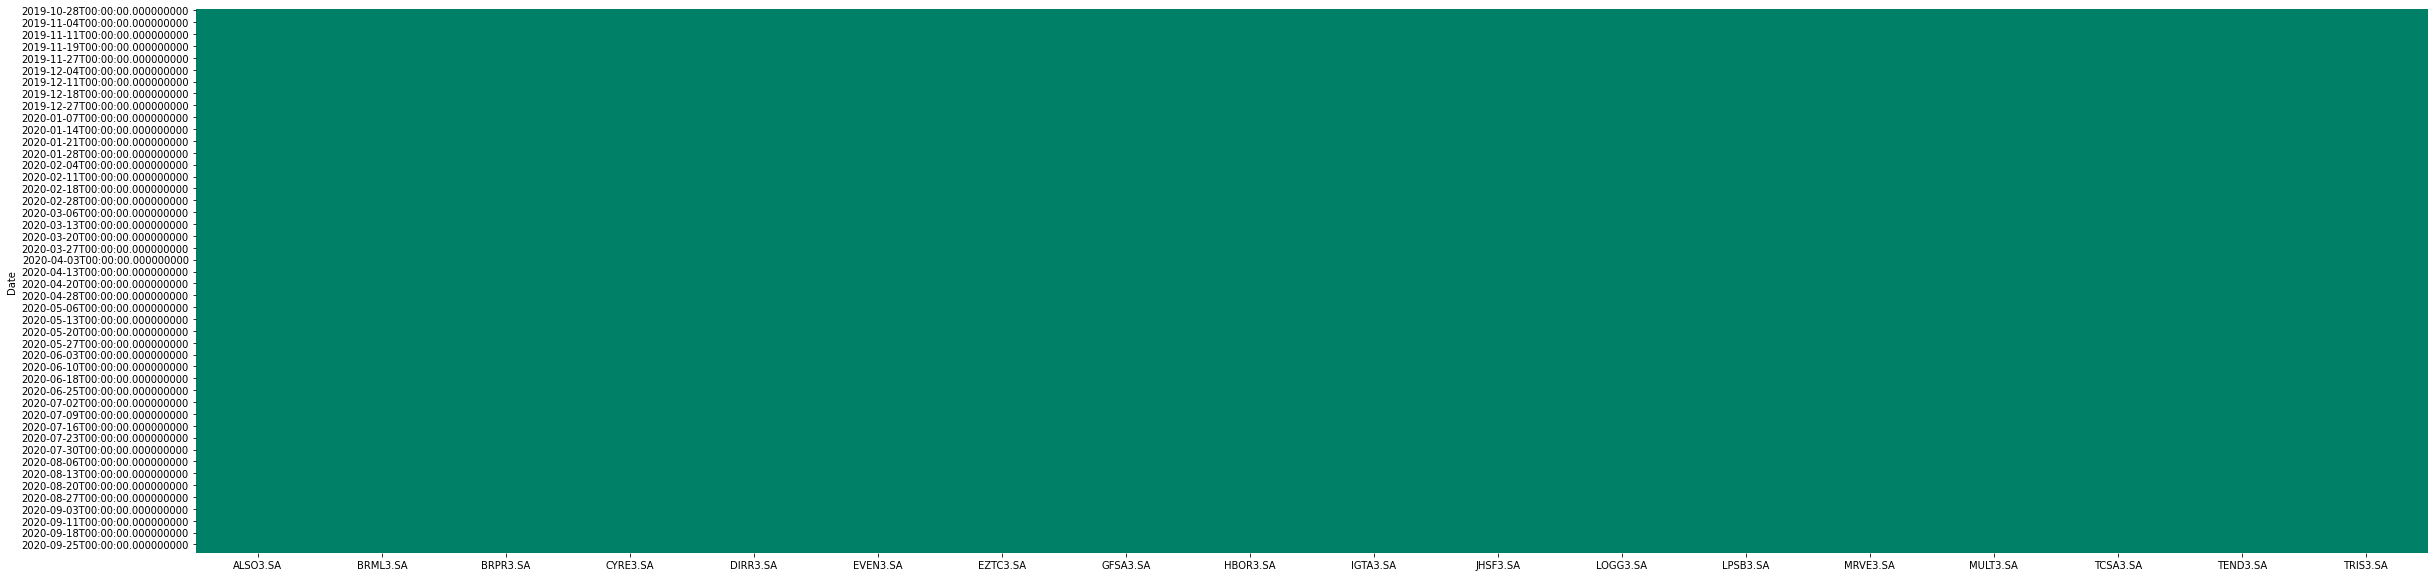

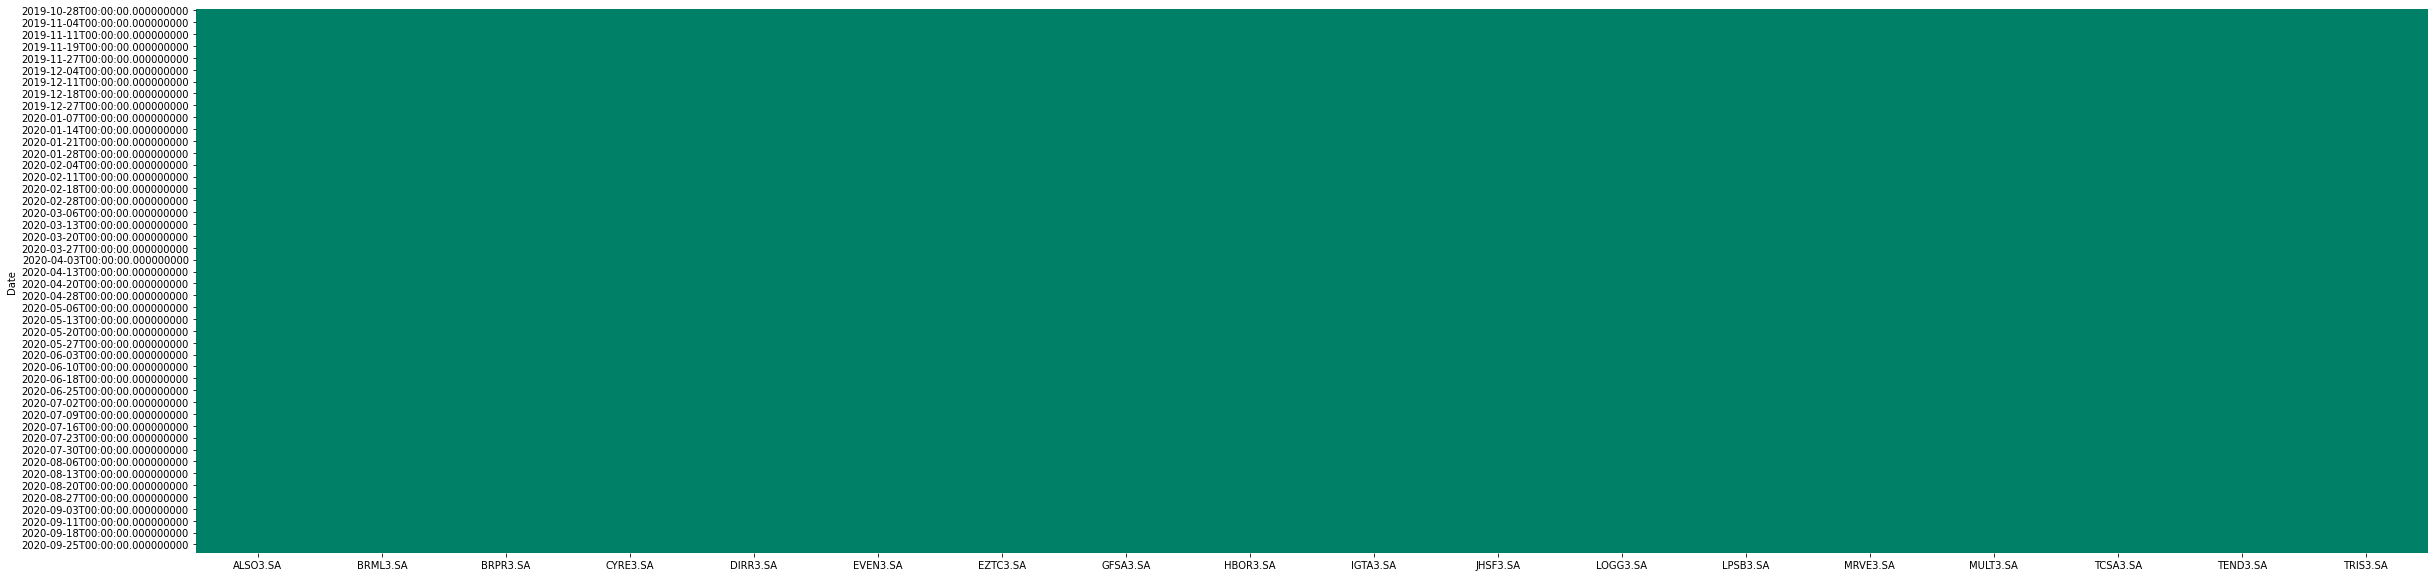

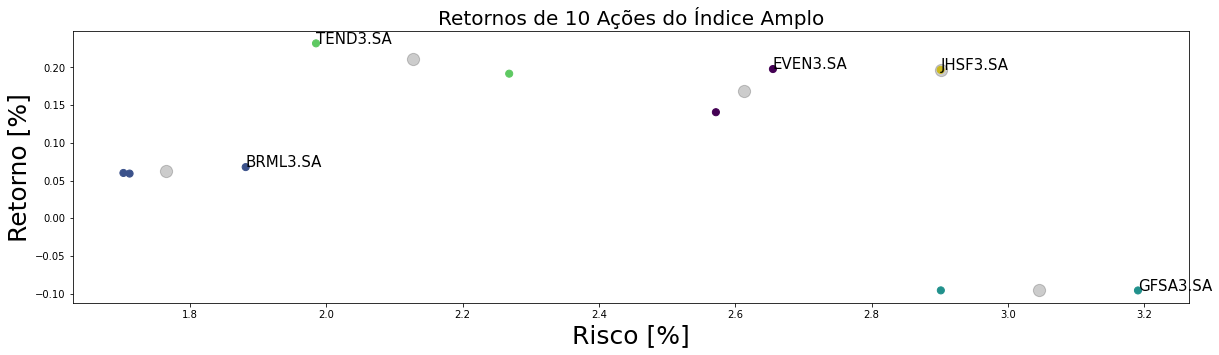

In [9]:
from tqdm import tqdm
bestes = []
for index in tqdm(indexes):
    best = fi.get_best_actives(train[index], test[index], 5, index)
    bestes.append(best)
bestes

In [10]:
bestes

[('IFNC', ('IRBR3.SA', 0.11470204273258071)),
 ('BDRX', ('AAPL34.SA', 0.07925892661211499)),
 ('IMAT', ('CSNA3.SA', 0.03283336867547797)),
 ('IEE', ('CESP6.SA', 0.10342208725748588)),
 ('IMOB', ('TEND3.SA', 0.09399037738228265))]

In [ ]:
### Questão 4

In [11]:
data = {}
data2 = {}
for a in bestes:
    data[a[1][0]] = []
    data2[a[1][0]] = []

In [12]:
data, data2

({'IRBR3.SA': [],
  'AAPL34.SA': [],
  'CSNA3.SA': [],
  'CESP6.SA': [],
  'TEND3.SA': []},
 {'IRBR3.SA': [],
  'AAPL34.SA': [],
  'CSNA3.SA': [],
  'CESP6.SA': [],
  'TEND3.SA': []})

In [13]:
for i in range(496):
    data[bestes[0][1][0]].append(train[bestes[0][0]][bestes[0][1][0]].iloc[i])
    data[bestes[1][1][0]].append(train[bestes[1][0]][bestes[1][1][0]].iloc[i])
    data[bestes[2][1][0]].append(train[bestes[2][0]][bestes[2][1][0]].iloc[i])
    data[bestes[3][1][0]].append(train[bestes[3][0]][bestes[3][1][0]].iloc[i])
    data[bestes[4][1][0]].append(train[bestes[4][0]][bestes[4][1][0]].iloc[i])

for i in range(228):
    data2[bestes[0][1][0]].append(test[bestes[0][0]][bestes[0][1][0]].iloc[i])
    data2[bestes[1][1][0]].append(test[bestes[1][0]][bestes[1][1][0]].iloc[i])
    data2[bestes[2][1][0]].append(test[bestes[2][0]][bestes[2][1][0]].iloc[i])
    data2[bestes[3][1][0]].append(test[bestes[3][0]][bestes[3][1][0]].iloc[i])
    data2[bestes[4][1][0]].append(test[bestes[4][0]][bestes[4][1][0]].iloc[i])


In [14]:
new_df = pd.DataFrame(data=data)
new_df_test = pd.DataFrame(data=data2)

In [15]:
new_df.head()

,IRBR3.SA,AAPL34.SA,CSNA3.SA,CESP6.SA,TEND3.SA
0,10.184237,11.877673,7.095104,11.650615,8.266505
1,10.125629,11.920903,6.995523,11.632718,8.100701
2,10.264506,11.834442,6.771467,11.498494,8.427570
3,10.264506,11.834442,6.771467,11.498494,8.427570
4,10.332370,12.292687,6.622097,11.140564,8.242818


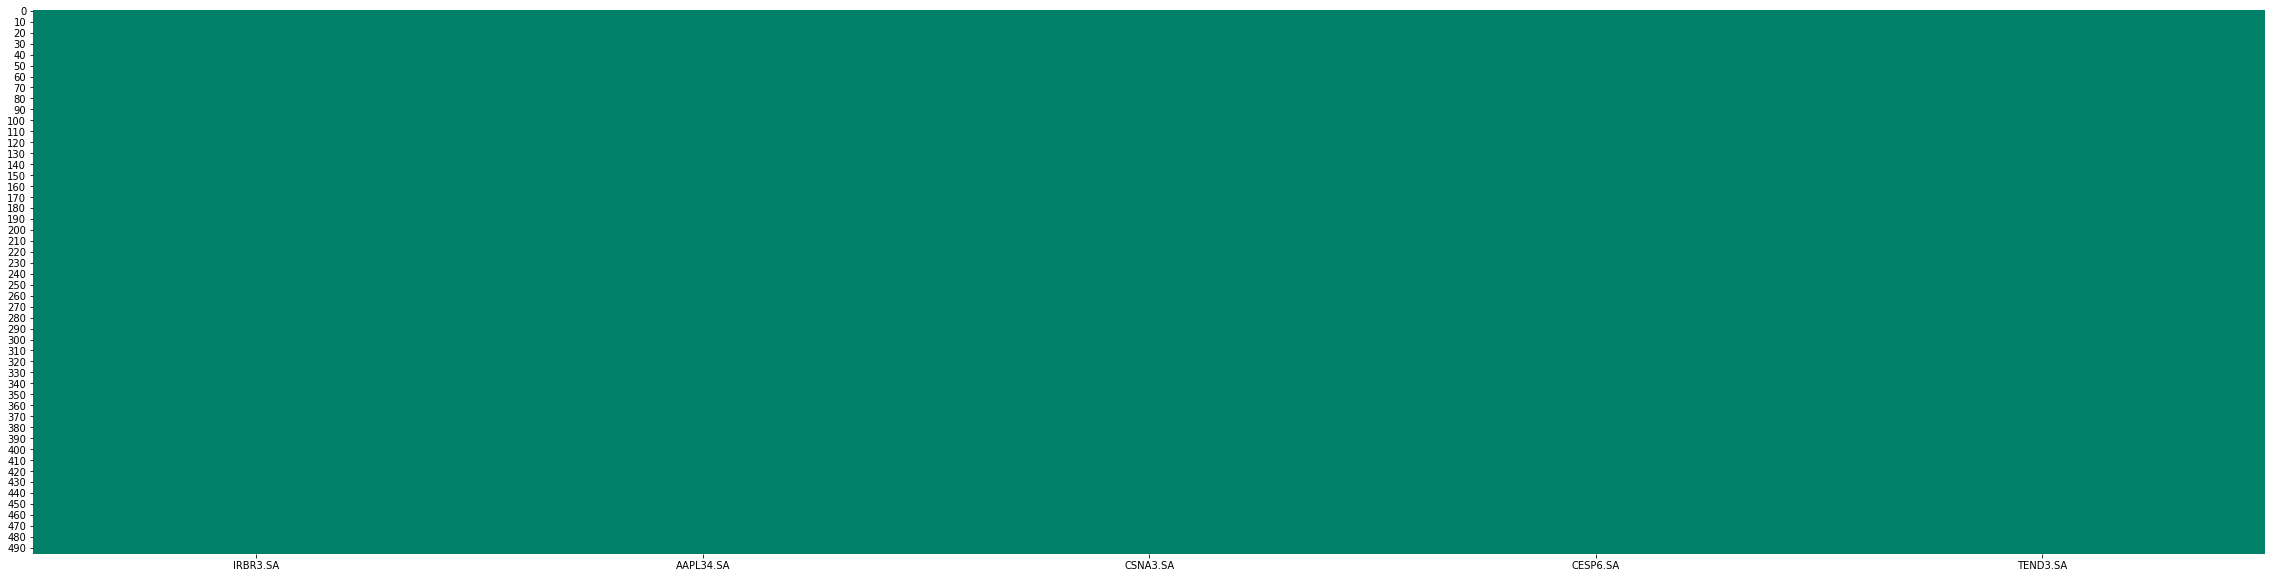

In [16]:
fi.plot_data_segmentation(new_df)
pass

In [17]:
ret=new_df.diff().dropna().copy()
ret=100*ret/new_df.iloc[0]

In [18]:
ret2 = new_df_test.diff().dropna().copy()
ret2 = 100*ret2/new_df_test.iloc[0]

In [19]:
ret

,IRBR3.SA,AAPL34.SA,CSNA3.SA,CESP6.SA,TEND3.SA
1,-0.575469,0.363961,-1.403514,-0.153611,-2.005732
2,1.363646,-0.727929,-3.157899,-1.152076,3.954138
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.666358,3.858039,-2.105250,-3.072200,-2.234952
5,1.575455,0.491375,4.912271,1.612910,-3.381097
...,...,...,...,...,...
491,5.141668,-3.788595,2.250383,-0.954999,2.736830
492,-0.467424,0.041173,-1.687797,-0.557096,-4.164762
493,-2.337085,1.956074,-12.939658,-0.159145,-0.237977
494,-1.869735,0.350038,-5.485287,1.034563,-0.476000


In [20]:
returns = ret.mean().values

In [21]:
returns_test = ret2.mean().values

In [22]:
returns, returns_test

(array([0.52772881, 0.20878651, 0.14491278, 0.27419304, 0.37539925]),
 array([-0.35299311,  0.7355195 ,  0.11336111,  0.00748329,  0.06866733]))

In [23]:
import numpy as np
def TPM_Maior_Sharpe(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    rf=0.2
    temp=np.dot(np.linalg.inv(C),pd.DataFrame(MU-np.dot(ONE,rf)))
    qm=temp/temp.sum()
    mu_m=np.dot(qm.transpose(),MU)
    sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
    return qm,mu_m,sigma_m

qm,mu_m,sigma_m = TPM_Maior_Sharpe(ret, 1000)

In [24]:
[print("ATIVO: {} PESO: {}\n".format(active, round(qm[i][0],2))) for i, active in enumerate(ret.columns)]
pass

ATIVO: IRBR3.SA PESO: 0.63

ATIVO: AAPL34.SA PESO: -0.03

ATIVO: CSNA3.SA PESO: -0.3

ATIVO: CESP6.SA PESO: 0.36

ATIVO: TEND3.SA PESO: 0.34



In [25]:
porc_retorno = 0
for each in range(ret.shape[1]):
    porc_retorno += qm[each][0] * returns[each]
porc_retorno
porc_retorno2 = 0
for each in range(ret.shape[1]):
    porc_retorno2 += qm[each][0] * returns_test[each]
porc_retorno, porc_retorno2

(0.5093538076578382, -0.25559263701013)

In [26]:
investimento = 100000
ganho_esperado = investimento * porc_retorno
ganho_test = investimento * porc_retorno2

In [27]:
round(ganho_esperado, 2), round(ganho_test, 2)

(50935.38, -25559.26)

In [28]:
soma = 0
for each in range(len(ret.columns)):
    soma+=qm[each][0]
soma

0.9999999999999999

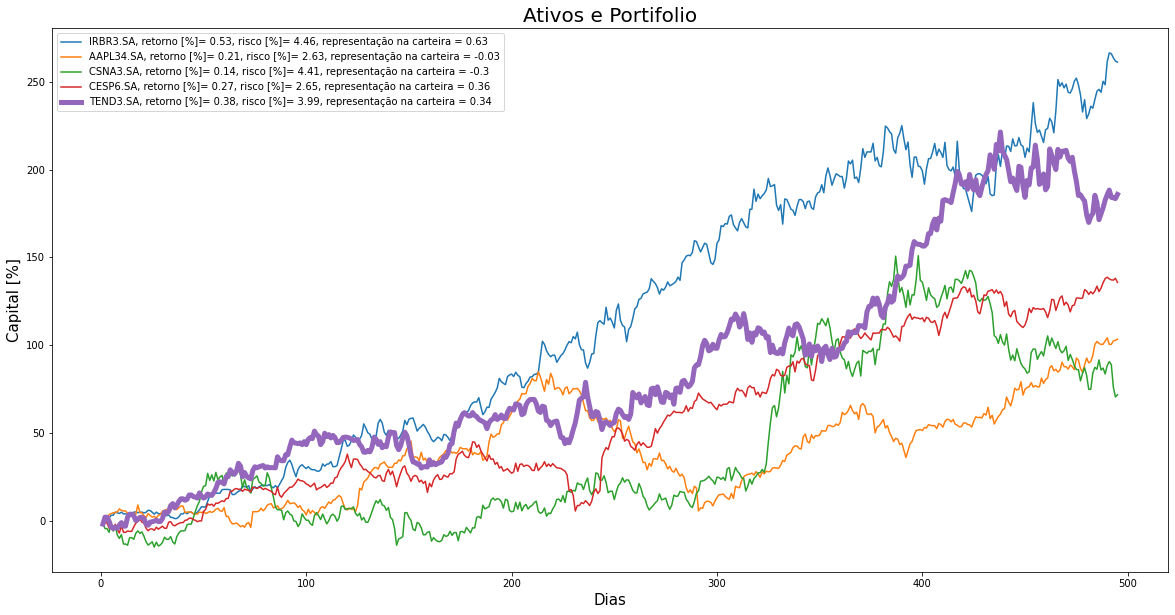

In [29]:
pesos=[qm[i][0] for i in range(len(qm))]+[1]
plt.figure(figsize=(20, 10))

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        plt.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
    if i==max(range(len(ret.columns))):
        plt.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
plt.legend(loc='upper left')
plt.xlabel("Dias",fontsize=15)
plt.ylabel('Capital [%]',fontsize=15)
plt.title("Ativos e Portifolio",fontsize=20)
pass

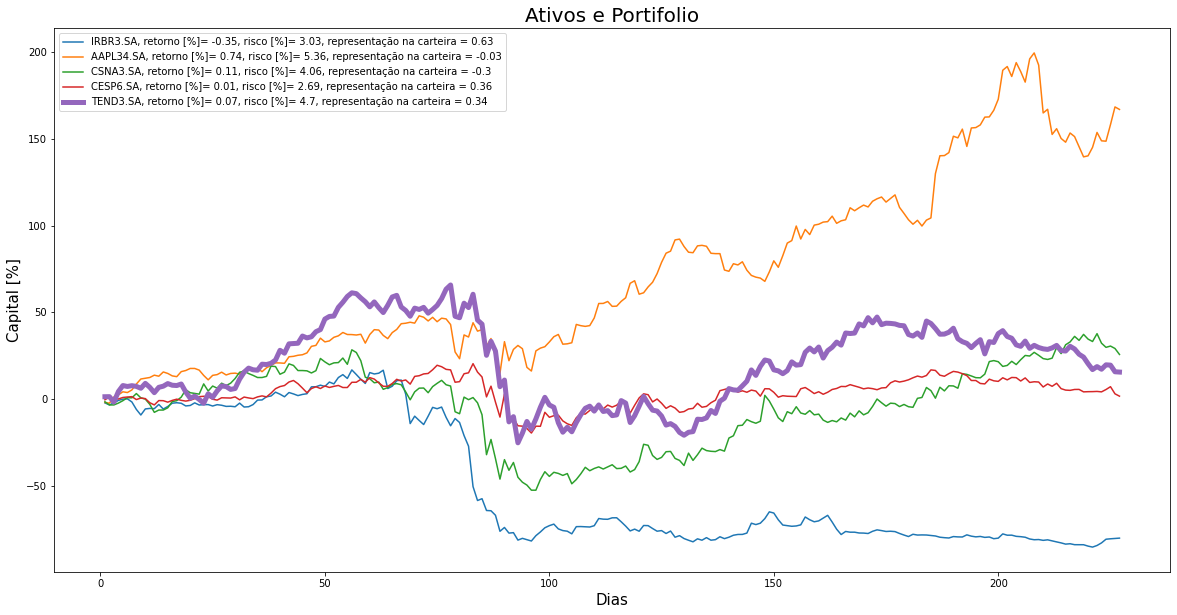

In [30]:
pesos=[qm[i][0] for i in range(len(qm))]+[1]
plt.figure(figsize=(20, 10))

for i in range(len(ret2.columns)):
    labeldf=ret2.columns[i]+", retorno [%]= "+str(round(ret2.mean()[i],2)) +", risco [%]= "+str(round(ret2.std()[i],2))
    if i!=max(range(len(ret2.columns))):
        plt.plot(ret2[ret2.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
    if i==max(range(len(ret2.columns))):
        plt.plot(ret2[ret2.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
plt.legend(loc='upper left')
plt.xlabel("Dias",fontsize=15)
plt.ylabel('Capital [%]',fontsize=15)
plt.title("Ativos e Portifolio",fontsize=20)
pass

## Impressões   
As impressões quando ao método de extração de ativos através do k-means foi meio confusa, pois fazendo outras análises ele não pegou os ativos que tinham os melhores sharpes mesmo que o critério usado para fazer os clusters do k-means seja o sharpe. Mas mesmo assim ele pegou ótimos ativos com risco relativamente baixo.

Quando foi feito o portifólio os retornos dos ativos pareciam bem condizentes com os pesos que lhe foram atribuídos na metodologia dando um retorno incrível de 55%, porém quando fomos testar nosso portifólio nos dados de teste o resultado foi totalmente contrário tendo assim um prejuíso de 25% nas ações. O grupo acredita que muito desses pontos foram por conta do covid-19 e seu impactos nos ativos escolhidos.